In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Transformer
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.cm as cm

In [3]:
xyz = pd.read_table("06_tx_1965-2023_jrk.xyz", delim_whitespace=True)

/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_8718/152992696.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  xyz = pd.read_table("06_tx_1965-2023_jrk.xyz", delim_whitespace=True)


In [4]:
xyz

X          Y     Z         T   loc
0        109682.41  558181.19  3.77  5-8-1965   900
1        109677.53  558180.09  3.63  5-8-1965   900
2        109672.65  558179.00  3.55  5-8-1965   900
3        109667.77  558177.91  3.41  5-8-1965   900
4        109662.89  558176.82  3.16  5-8-1965   900
...            ...        ...   ...       ...   ...
1380678  117558.08  579018.26 -1.44  3-4-2023  3081
1380679  117551.46  579025.77 -1.70  3-4-2023  3081
1380680  117544.85  579033.27 -1.88  3-4-2023  3081
1380681  117538.24  579040.77 -2.14  3-4-2023  3081
1380682  117531.63  579048.27 -2.21  3-4-2023  3081

[1380683 rows x 5 columns]

In [5]:
xyz["year"] = xyz["T"].str[-4:].astype(int)

In [5]:
def plot_all_points(): 
    plt.figure();
    plt.plot(xyz["X"], xyz["Y"]);
    plt.show();

## Part 1: Plotting the coastline of Texel

In [6]:
def coastline(baseline, steps): 

    years = [year for year in xyz["year"].unique()]
    
    for year in years: 
        concat_rows = []
        if year == baseline: 
            data_year = xyz[xyz["year"] == year]
            locations = [location for location in data_year["loc"].unique()]
            for location in locations:  
                data_loc = data_year[data_year["loc"] == location]
                index_highest = data_loc['Z'].idxmax()
                concat_rows.append(data_loc.loc[index_highest, :].copy())
    
            baseline += steps  
            data_highest = pd.DataFrame(concat_rows)
            
            # Step 1: Convert RD (X, Y) to Latitude/Longitude
            # Define the transformer from RD (EPSG:28992) to WGS84 (EPSG:4326)
            transformer = Transformer.from_crs("EPSG:28992", "EPSG:4326")
            
            # Step 2: Apply the transformation to all X and Y coordinates in the DataFrame
            latlon_coords = data_highest.apply(lambda row: transformer.transform(row["X"], row["Y"]), axis=1)
            data_highest["Latitude"], data_highest["Longitude"] = zip(*latlon_coords)
            
            # Step 3: Map scatter points with basemap of Texel
            map = Basemap(projection='merc', llcrnrlon=4.65, llcrnrlat=52.95, urcrnrlon=4.9, urcrnrlat=53.2, resolution='h')
            map.drawcoastlines()
            map.fillcontinents(color='lightgray')
            
            x, y = map(data_highest["Longitude"].values, data_highest["Latitude"].values)
            map.scatter(x, y, c=data_highest["Z"], s=25, cmap='viridis', edgecolors='k', zorder=5)
            plt.colorbar(label="Z (Altitude)")
            plt.title(f'Coastline Texel in {year}')
            plt.show()

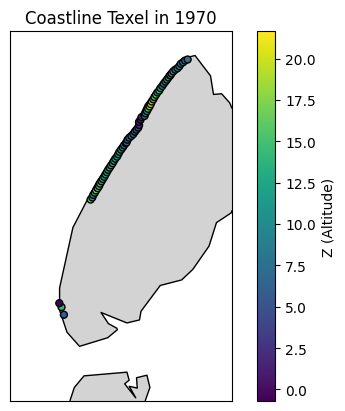

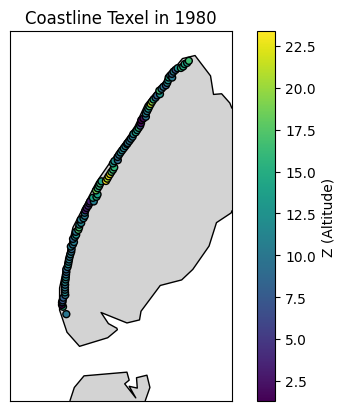

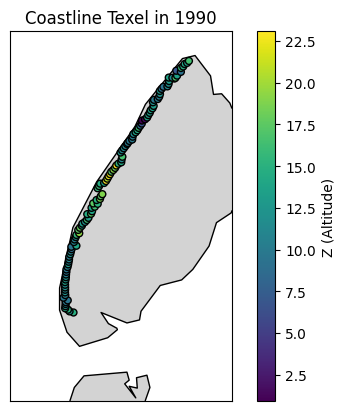

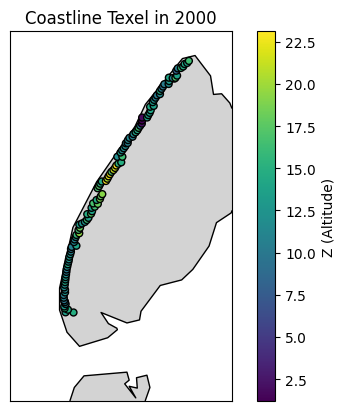

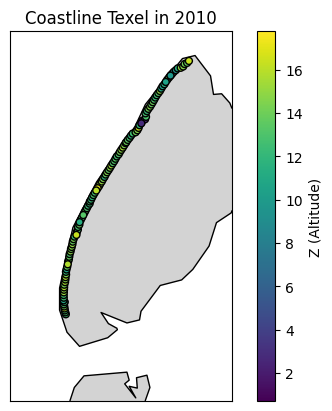

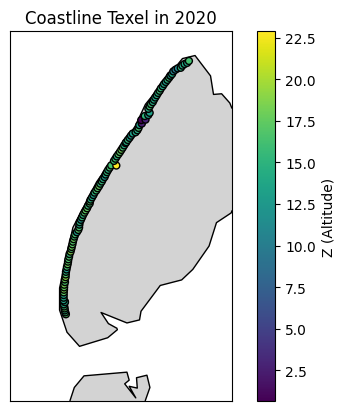

In [7]:
coastline(1970, 10)

## Part 2: Sediment budget over time

In [24]:
xyz

X          Y     Z         T   loc  year
0        109682.41  558181.19  3.77  5-8-1965   900  1965
1        109677.53  558180.09  3.63  5-8-1965   900  1965
2        109672.65  558179.00  3.55  5-8-1965   900  1965
3        109667.77  558177.91  3.41  5-8-1965   900  1965
4        109662.89  558176.82  3.16  5-8-1965   900  1965
...            ...        ...   ...       ...   ...   ...
1380678  117558.08  579018.26 -1.44  3-4-2023  3081  2023
1380679  117551.46  579025.77 -1.70  3-4-2023  3081  2023
1380680  117544.85  579033.27 -1.88  3-4-2023  3081  2023
1380681  117538.24  579040.77 -2.14  3-4-2023  3081  2023
1380682  117531.63  579048.27 -2.21  3-4-2023  3081  2023

[1380683 rows x 6 columns]

In [9]:
locations = [location for location in xyz["loc"].unique()]
locations = sorted(locations)

In [10]:
print(locations)

[900, 915, 930, 945, 960, 976, 1000, 1001, 1013, 1033, 1053, 1073, 1093, 1108, 1128, 1148, 1168, 1190, 1210, 1230, 1249, 1269, 1289, 1298, 1312, 1332, 1352, 1372, 1392, 1410, 1430, 1450, 1470, 1490, 1506, 1526, 1546, 1566, 1586, 1604, 1624, 1644, 1664, 1684, 1703, 1723, 1743, 1763, 1778, 1793, 1813, 1833, 1853, 1873, 1893, 1912, 1932, 1952, 1972, 1992, 2011, 2031, 2051, 2071, 2091, 2111, 2131, 2151, 2171, 2191, 2211, 2231, 2251, 2271, 2291, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2901, 2917, 2937, 2957, 2977, 3001, 3021, 3041, 3061, 3081]


In [12]:
threshold_texel_zuidwest = [900,1298]
threshold_national_park = [1312,1853]
threshold_koog=[1873,2091]
threshold_slufter=[2111,3081]

In [14]:
region = []
for location in locations:
    if location >= threshold_texel_zuidwest[0] and location <= threshold_texel_zuidwest[1]:
        region.append(location)
    else:
        pass
    
print(region)

[900, 915, 930, 945, 960, 976, 1000, 1001, 1013, 1033, 1053, 1073, 1093, 1108, 1128, 1148, 1168, 1190, 1210, 1230, 1249, 1269, 1289, 1298]


In [17]:
def regional_sediment_budget(data, dune_threshold, region_threshold, region_name): 
    """
    Computes sediment budget per year
    """
    volume_development = pd.DataFrame(columns=['Year', f"{region_name} Dune Volume"])
    years = [year for year in data["year"].unique()]
    for year in years: 
        data_year = data[data["year"] == year]
        #make a list of all unique locations in the dataset
        locations = [location for location in data_year["loc"].unique()]
        
        #filter the set of locations into different regions: Texel ZuidWest, Nationaal Park Duinen van Texel, De Koog, Slufter
        region = []
        for location in locations:
            if location >= threshold_texel_zuidwest[0] and location <= region_threshold[1]:
                region.append(location)
            else:
                pass

        volume_dunes = 0
        for raai in region:  
            data_loc = data_year[(data_year["loc"] == raai)]
            #data_rsp = data_loc[data_loc["X"] <= rsp]
            data_positive = data_loc[data_loc["Z"] > dune_threshold]
            volume_location = 0
            for i in range(1, len(data_positive)):
                # Calculate the area of the base formed by the X and Y coordinates
                base_area = np.abs((data_positive['X'].iloc[i] - data_positive['X'].iloc[i-1]) * 
                                   (data_positive['Y'].iloc[i] - data_positive['Y'].iloc[i-1]))
                
                # Average height between the two points
                avg_height = (data_positive['Z'].iloc[i] + data_positive['Z'].iloc[i-1]) / 2
                
                # Volume contribution from this segment
                volume_location += base_area * avg_height

            volume_dunes += volume_location
            
        # Create a temporary DataFrame for the new row
        new_row_df = pd.DataFrame({'Year': [year], f"{region_name} Dune Volume": [volume_dunes]})
        volume_development = pd.concat([volume_development, new_row_df], ignore_index=True)
        
    return volume_development

In [23]:
budget_zuidwest = regional_sediment_budget(data = xyz, dune_threshold = 3, region_threshold = [900,1298], region_name="ZuidWest")
budget_nationaal_park = regional_sediment_budget(data = xyz, dune_threshold = 3, region_threshold = [1312,1853], region_name="Nationaal Park")
budget_koog = regional_sediment_budget(data = xyz, dune_threshold = 3, region_threshold = [1873,2091], region_name="Koog")
budget_slufter = regional_sediment_budget(data = xyz, dune_threshold = 3, region_threshold = [2111,3081], region_name="Slufter")

/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_8718/1710201201.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  volume_development = pd.concat([volume_development, new_row_df], ignore_index=True)
/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_8718/1710201201.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  volume_development = pd.concat([volume_development, new_row_df], ignore_index=True)
/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_8718/1710201201.p

In [24]:
budget_zuidwest

Year  ZuidWest Dune Volume
0   1965           4372.593265
1   1966           3073.367660
2   1967           3073.100526
3   1968           3161.225772
4   1969           1345.402336
5   1970           1206.886843
6   1971           1187.985674
7   1972              0.000000
8   1973           1529.178944
9   1974           1442.709080
10  1975           3373.188863
11  1976           2556.252749
12  1977           2478.115943
13  1978          11483.346111
14  1979          19991.551247
15  1980          20934.795334
16  1982          20719.037101
17  1983          17975.361119
18  1984          21197.924635
19  1985          47219.238417
20  1986          46559.096874
21  1987          48247.515614
22  1988          49012.385905
23  1989          73111.415849
24  1990          76137.324063
25  1991          87950.029742
26  1992          80942.365848
27  1993          75422.570518
28  1994          79962.631972
29  1995          77319.020106
30  1996          81032.686321
31  1997          89023.546861
32  1998          83375.006995
33  1999          90977.443447
34  2000          90977.443447
35  2001          79531.390449
36  2002          79531.390449
37  2003          87803.487993
38  2004          14647.590099
39  2005          14355.621850
40  2006          15613.921273
41  2007          15216.321670
42  2008          30459.438708
43  2009          94658.265489
44  2010          15784.186272
45  2011          31771.048736
46  2012          31248.913201
47  2013          32379.987585
48  2014          32451.808504
49  2015          32258.897363
50  2016          32632.492900
51  2017          32995.152580
52  2018          33064.493584
53  2019          33147.499373
54  2020          31860.193558
55  2021          33582.308871
56  2022          33746.151782
57  2023          15240.801754

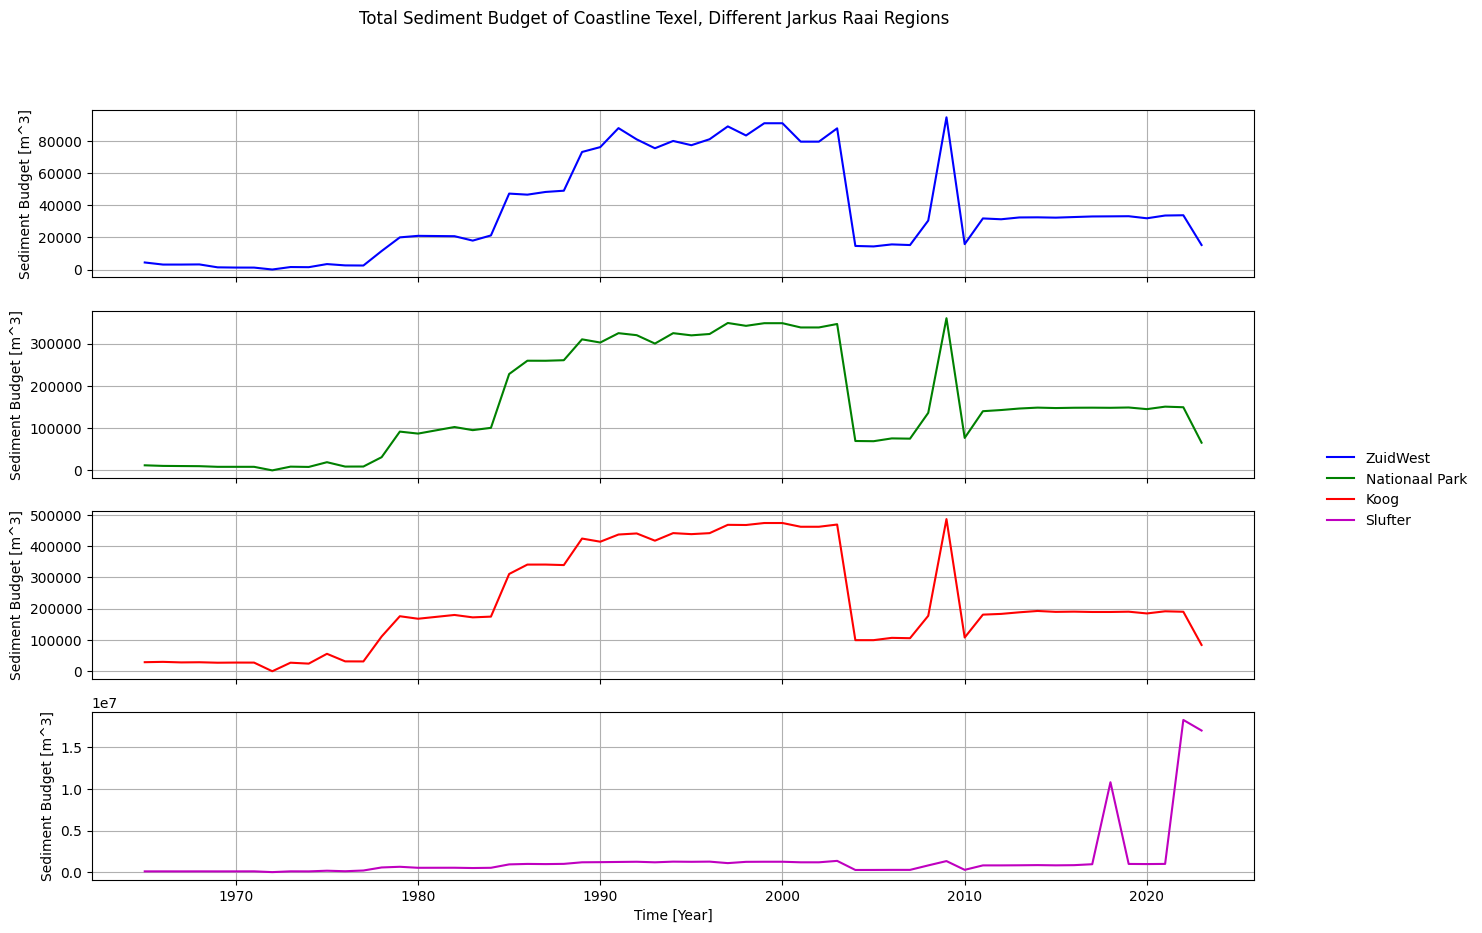

In [59]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(15, 10))
plt.suptitle(f"Total Sediment Budget of Coastline Texel, Different Jarkus Raai Regions")
#plt.figure(figsize=(10,6))

ax1.plot(budget_zuidwest["Year"], budget_zuidwest["ZuidWest Dune Volume"], color='b', label = 'ZuidWest')
ax2.plot(budget_nationaal_park["Year"], budget_nationaal_park["Nationaal Park Dune Volume"], color='g', label = 'Nationaal Park')
ax3.plot(budget_koog["Year"], budget_koog["Koog Dune Volume"], color='r', label='Koog')
ax4.plot(budget_slufter["Year"], budget_slufter["Slufter Dune Volume"], color='m', label='Slufter')
ax1.grid()
ax1.set_ylabel('Sediment Budget [m^3]')
ax2.grid()
ax2.set_ylabel('Sediment Budget [m^3]')
ax3.grid()
ax3.set_ylabel('Sediment Budget [m^3]')
ax4.grid()
ax4.set_ylabel('Sediment Budget [m^3]')
ax4.set_xlabel('Time [Year]')
plt.figlegend(loc = 'right', bbox_to_anchor=(1.05,0.5), frameon=False)
plt.show()

In [29]:
locations = [location for location in xyz["loc"].unique()]

In [96]:
print(locations)

[900, 960, 1000, 1793, 1813, 1833, 1853, 1873, 1893, 1912, 1932, 1952, 1972, 1992, 2011, 2031, 2051, 2071, 2091, 2111, 2131, 2151, 2171, 2191, 2211, 2231, 2251, 2271, 2291, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2901, 2917, 2937, 2957, 2977, 3001, 3021, 3041, 3061, 3081, 1001, 1013, 1033, 1053, 1073, 1093, 1108, 1128, 1148, 1168, 1190, 1210, 1230, 1249, 1269, 1289, 1298, 1312, 1332, 1352, 1372, 1392, 1410, 1430, 1450, 1470, 1490, 1506, 1526, 1546, 1566, 1586, 1604, 1624, 1644, 1664, 1684, 1703, 1723, 1743, 1763, 976, 1778, 915, 930, 945]


In [60]:
def sediment_budget_per_location(data = xyz, threshold = 3, jarkus = 900, baseline=1980, steps=10): 
    """
    Calculates the sediment budget per location and visualises the results. 
    """
    years = [year for year in data["year"].unique()]
    plt.figure(figsize=(10, 6))
    total_plots = (2020 - baseline)/steps
    nr_plots = 0
    for year in years: 
        if year==baseline: 
            baseline += steps 
            data_year = data[data["year"] == year]
            locations = [location for location in data_year["loc"].unique()]
            for location in locations: 
                if location == jarkus: 
                    data_loc = data_year[data_year["loc"] == location]
                    data_positive = data_loc[data_loc["Z"] > threshold]
                    volume_location_per_year = 0
                    for i in range(1, len(data_positive)):
                        # Calculate the area of the base formed by the X and Y coordinates
                        base_area = np.abs((data_positive['X'].iloc[i] - data_positive['X'].iloc[i-1]) * 
                                           (data_positive['Y'].iloc[i] - data_positive['Y'].iloc[i-1]))
                        
                        # Average height between the two points
                        avg_height = (data_positive['Z'].iloc[i] + data_positive['Z'].iloc[i-1]) / 2
                        
                        # Volume contribution from this segment
                        volume_location_per_year += base_area * avg_height

                    col = cm.viridis(nr_plots / total_plots)
                    col = cm.get_cmap('RdYlGn')(nr_plots / total_plots)
                    plt.plot(data_loc["X"], data_loc["Z"], color=col, label=f'{year}')
                    nr_plots += 1
        

    plt.grid()
    plt.title(f"Jarkus raai {jarkus} for different years")
    plt.axhline(y=3, color='black', linestyle='--', label='Dunes')
    plt.legend()
    plt.show()

/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_8718/1174317086.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col = cm.get_cmap('RdYlGn')(nr_plots / total_plots)


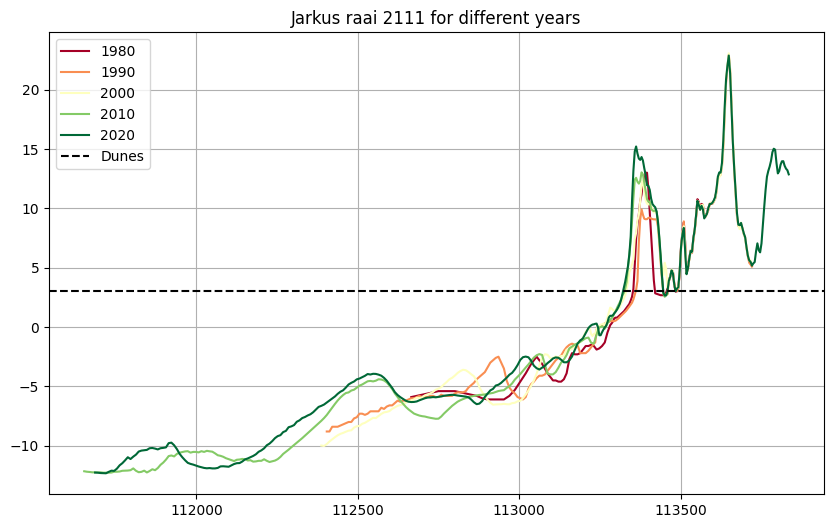

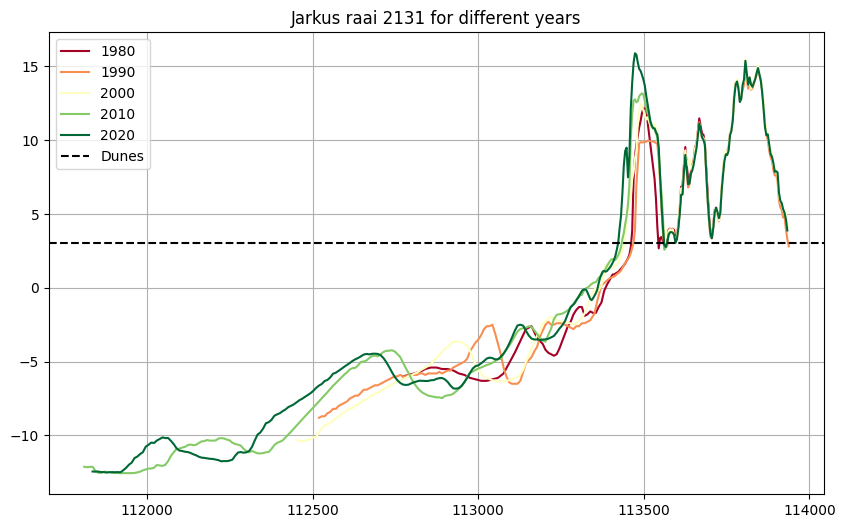

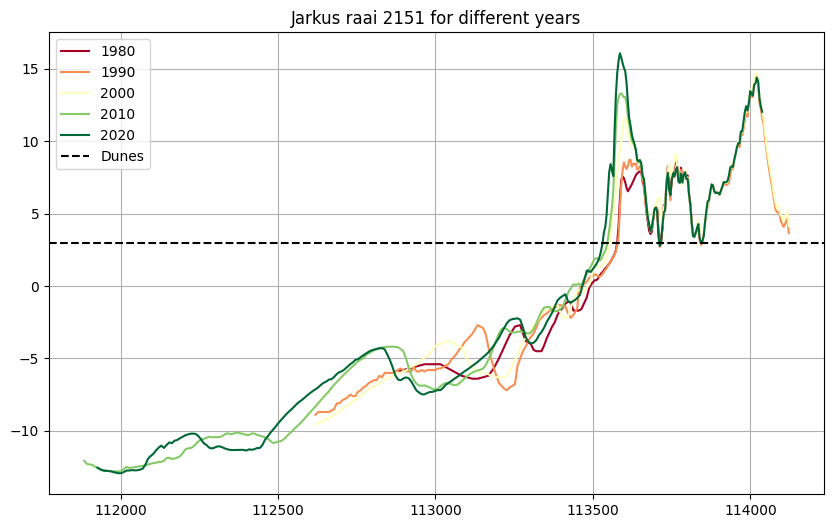

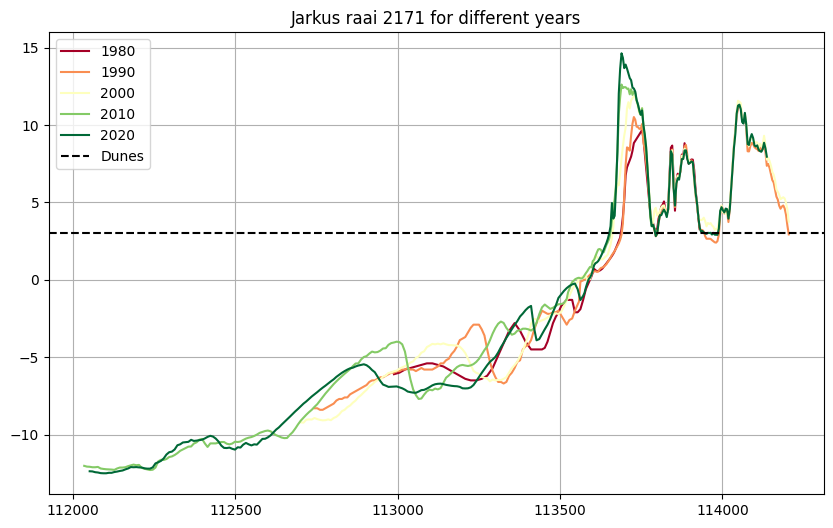

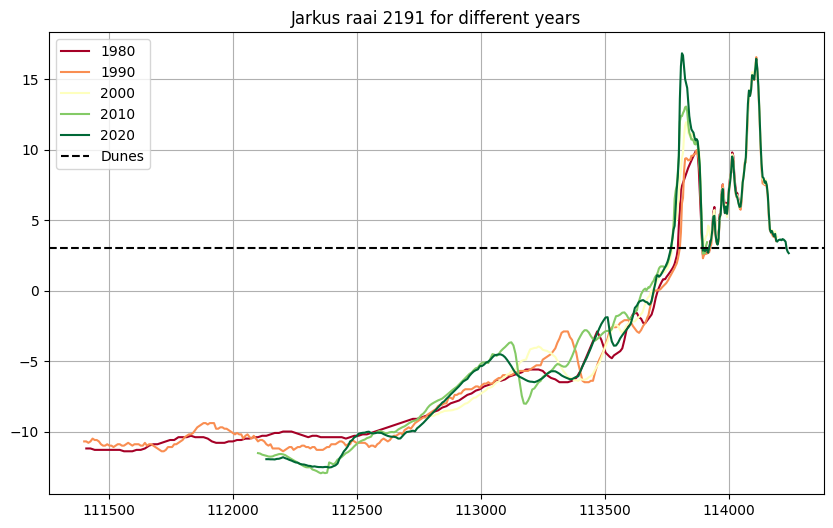

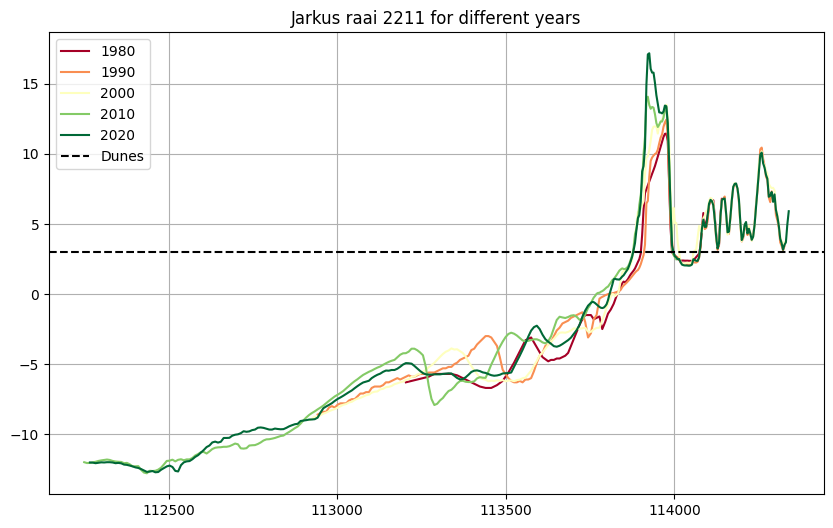

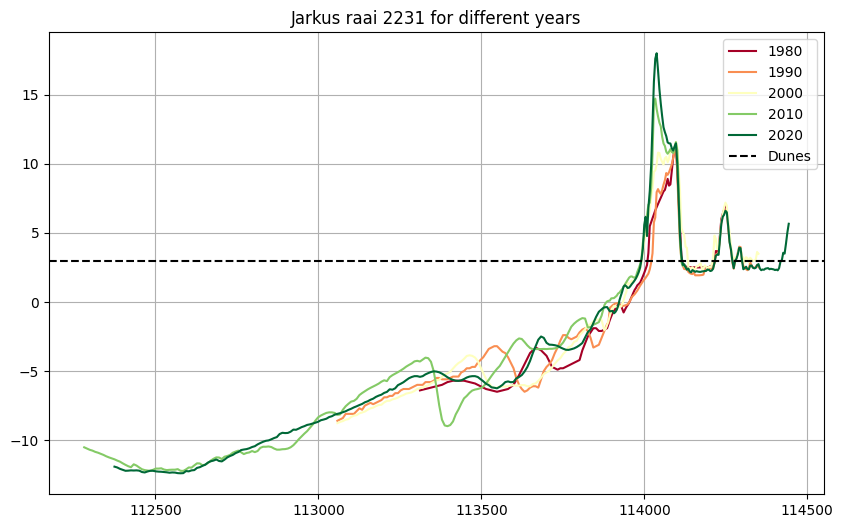

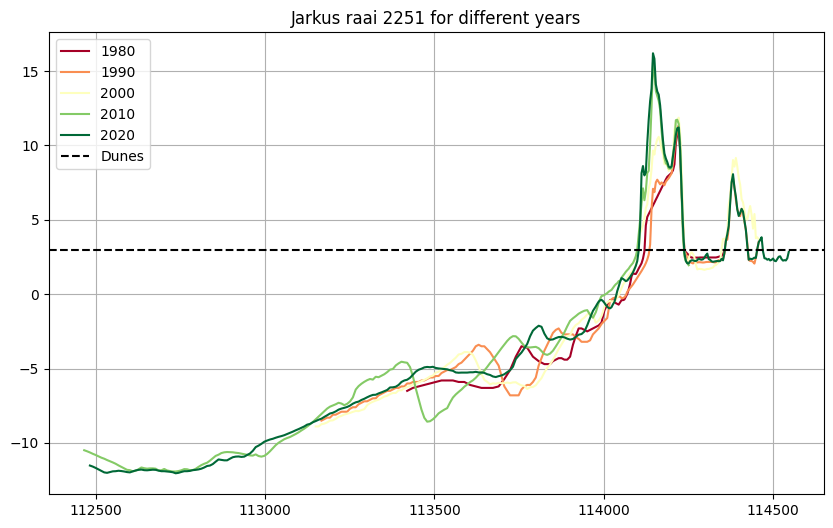

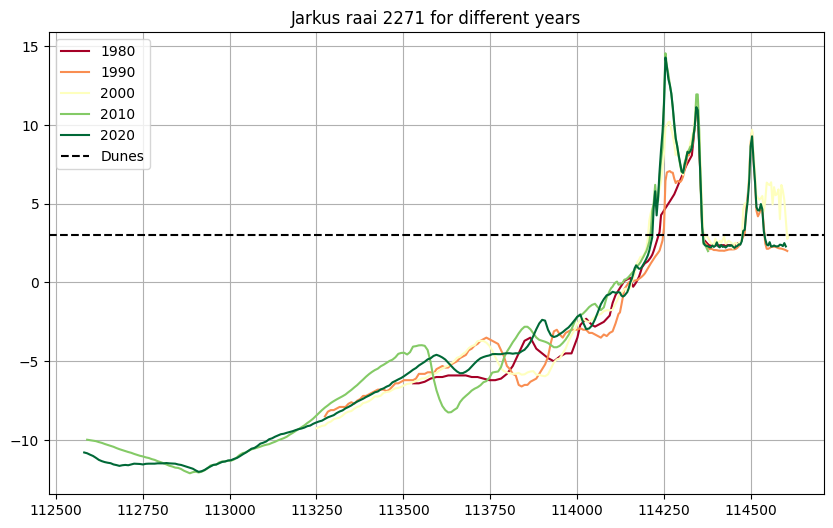

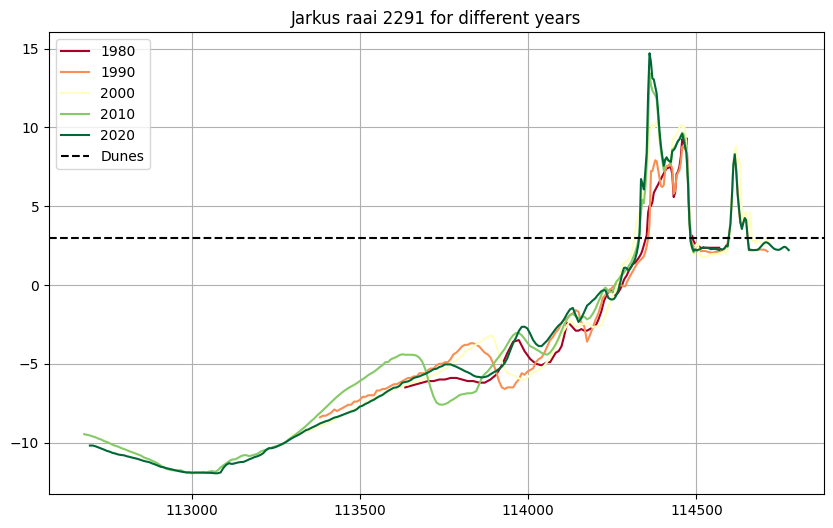

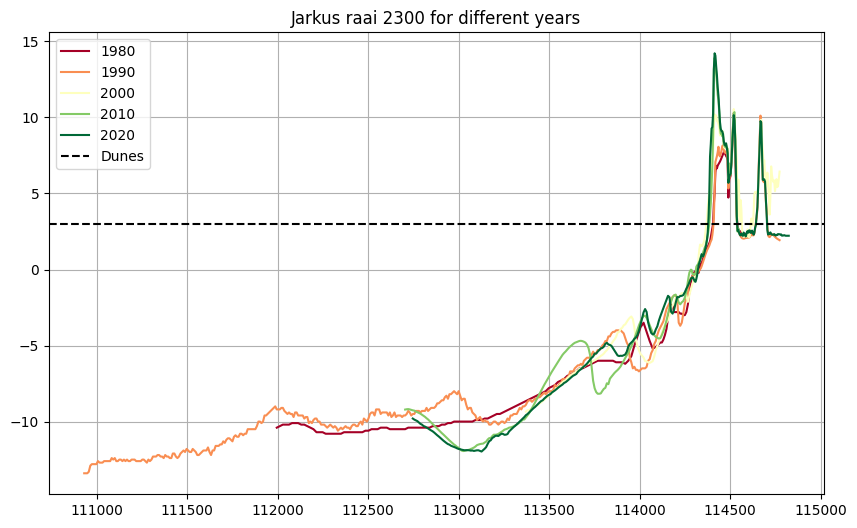

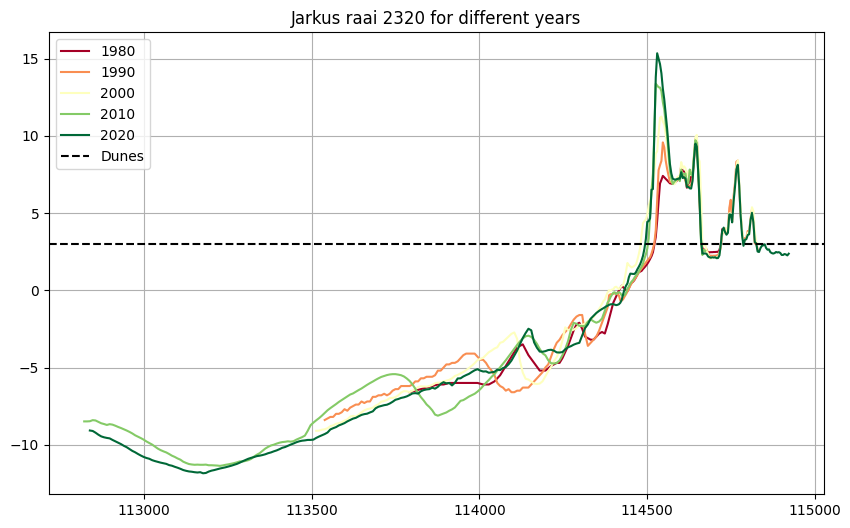

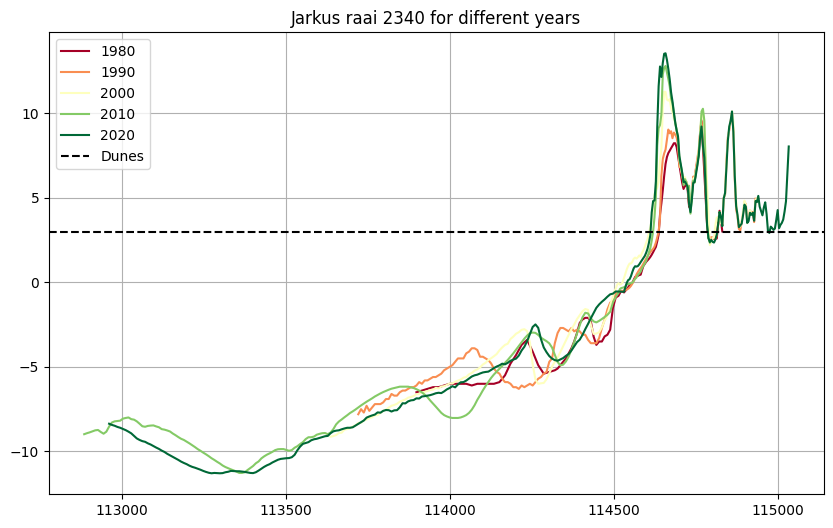

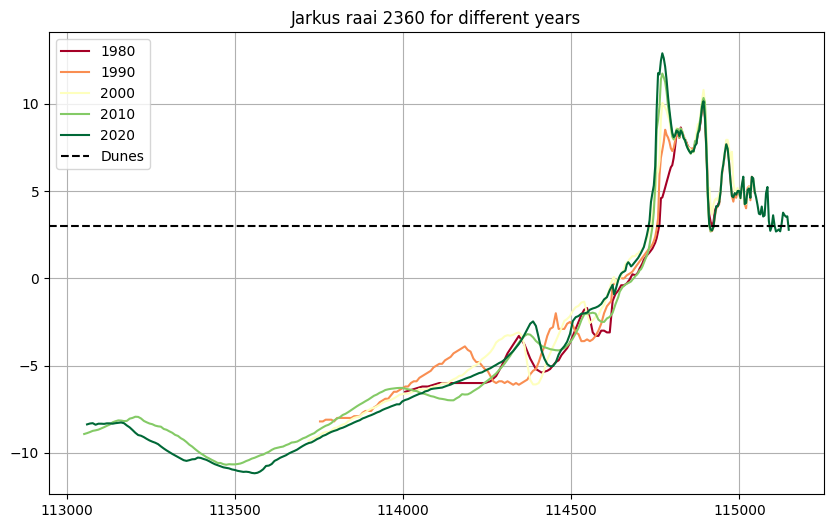

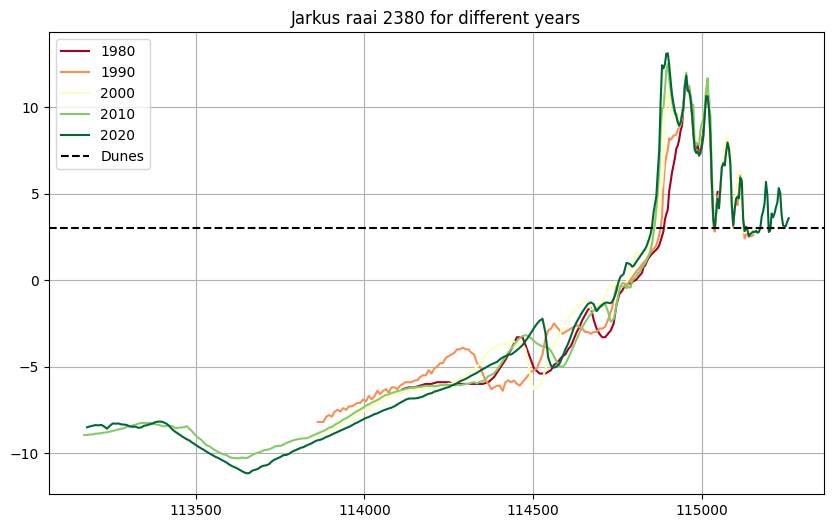

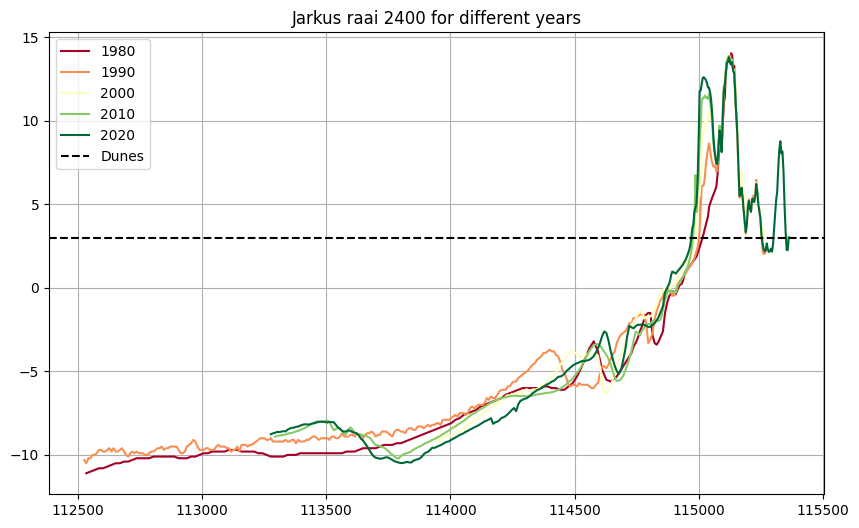

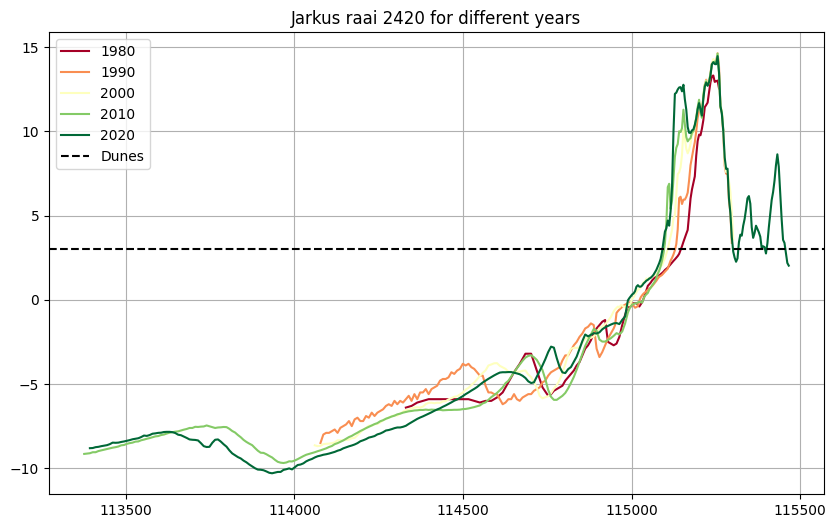

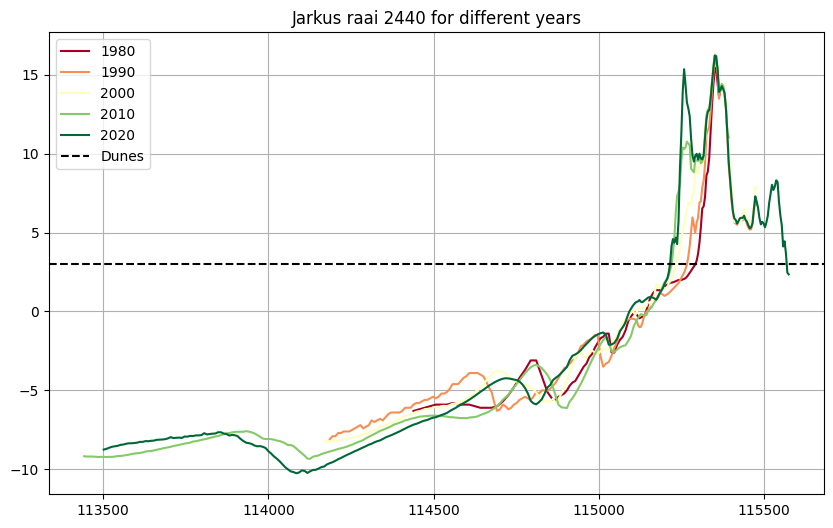

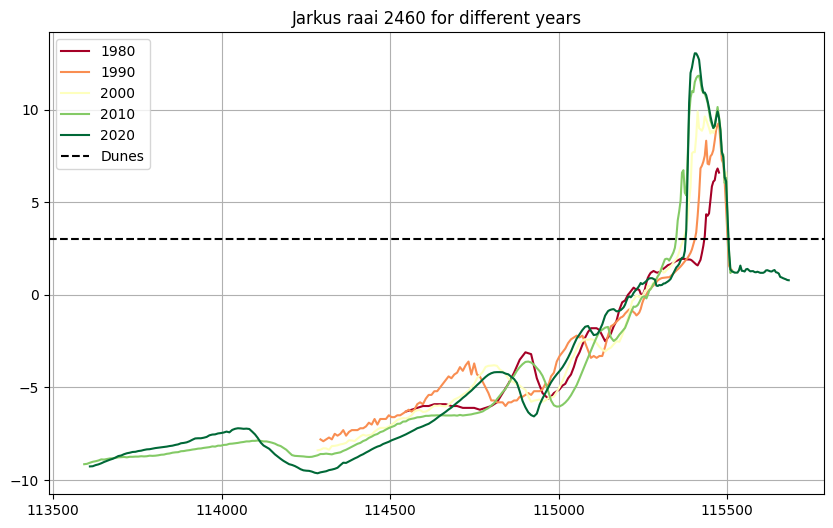

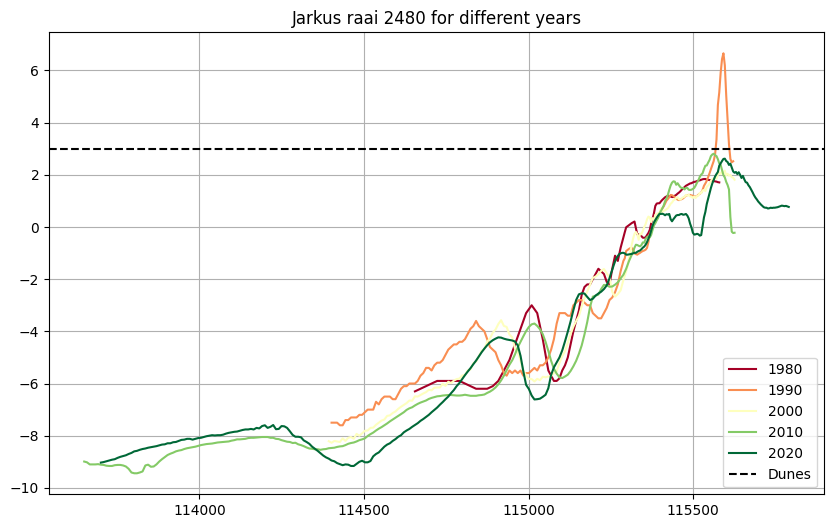

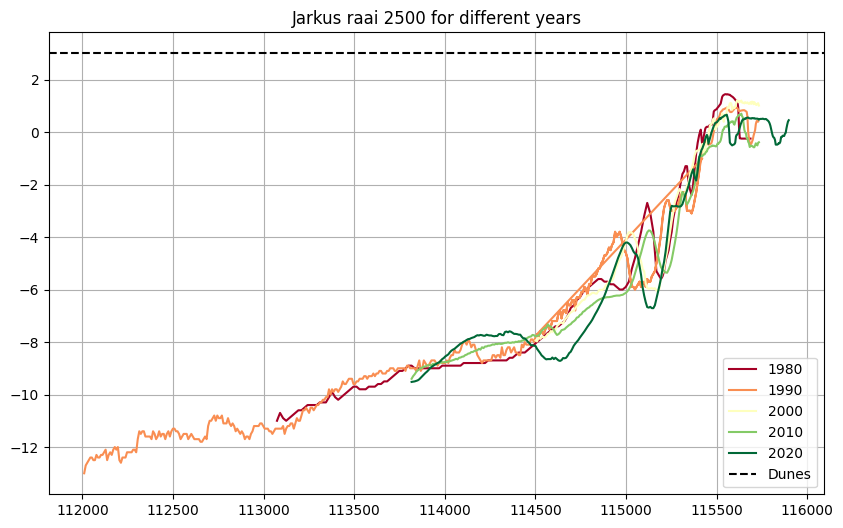

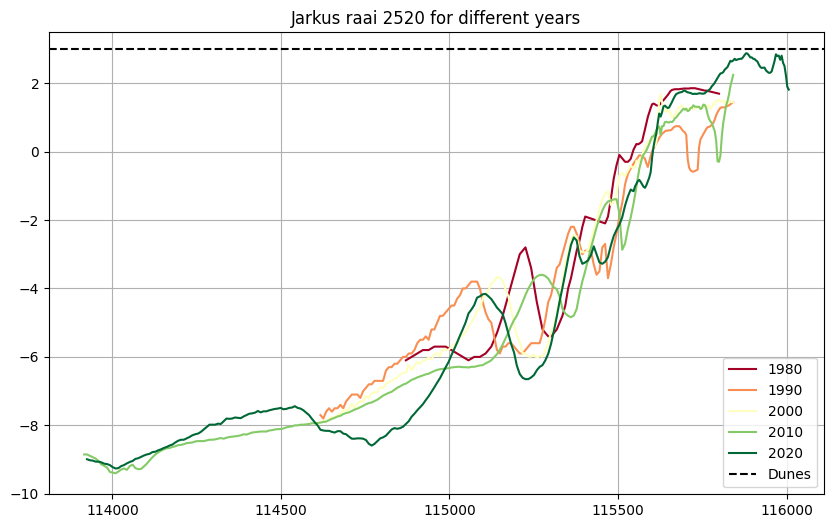

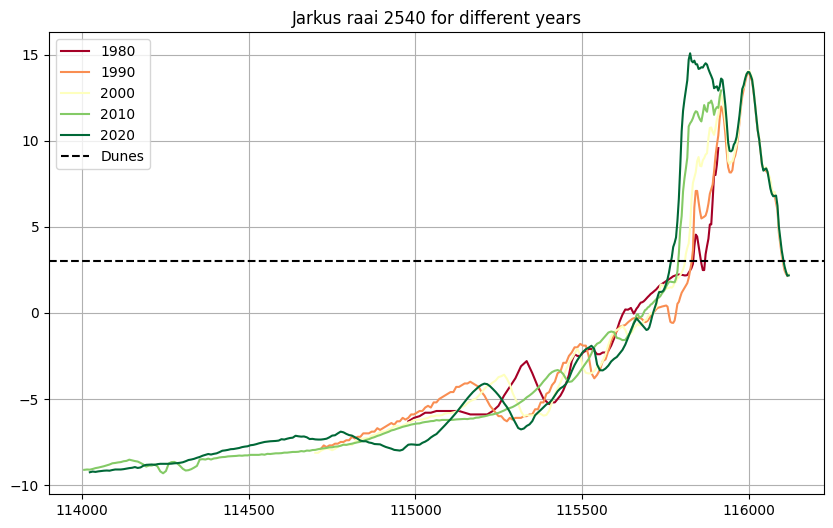

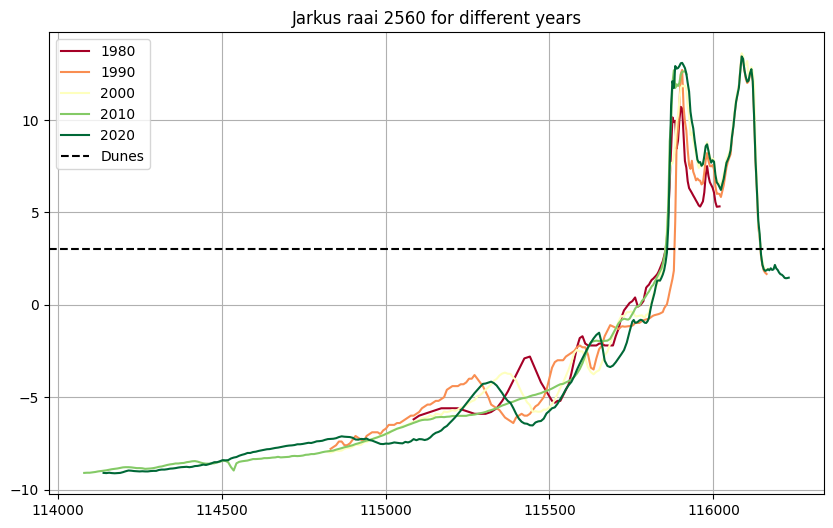

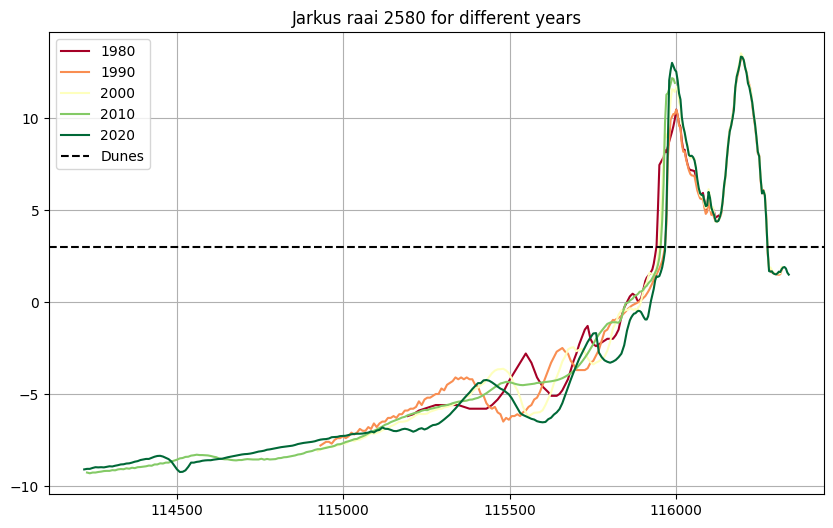

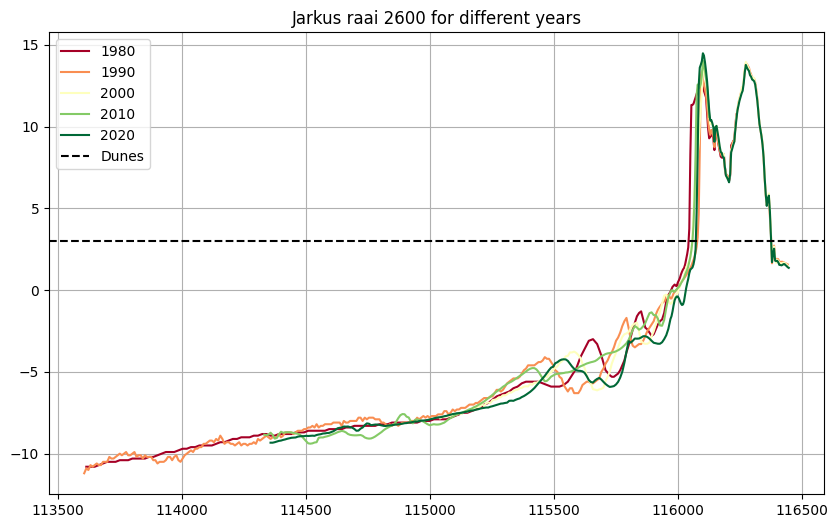

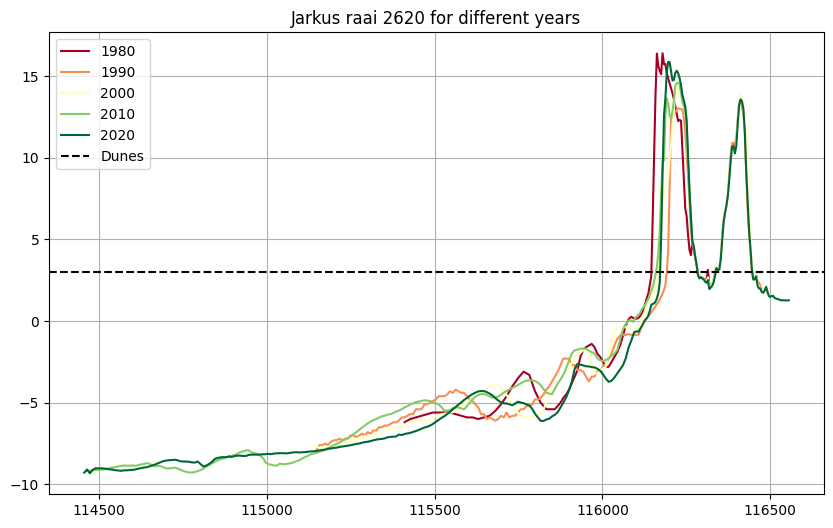

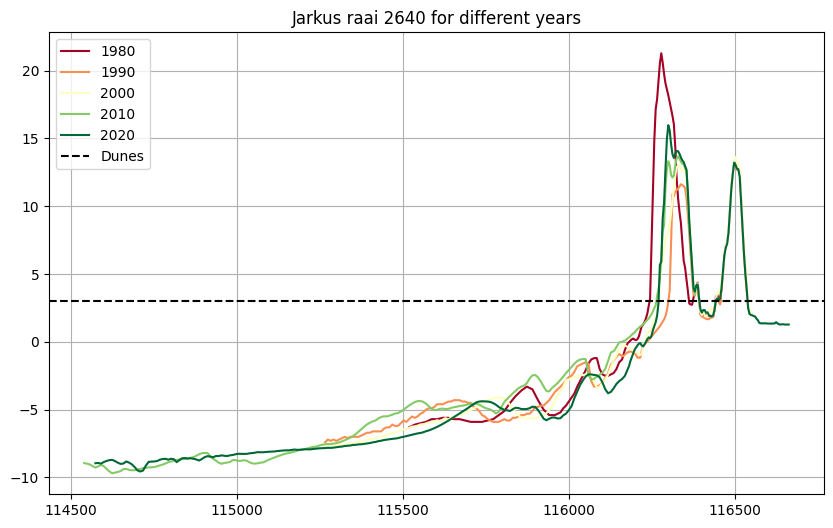

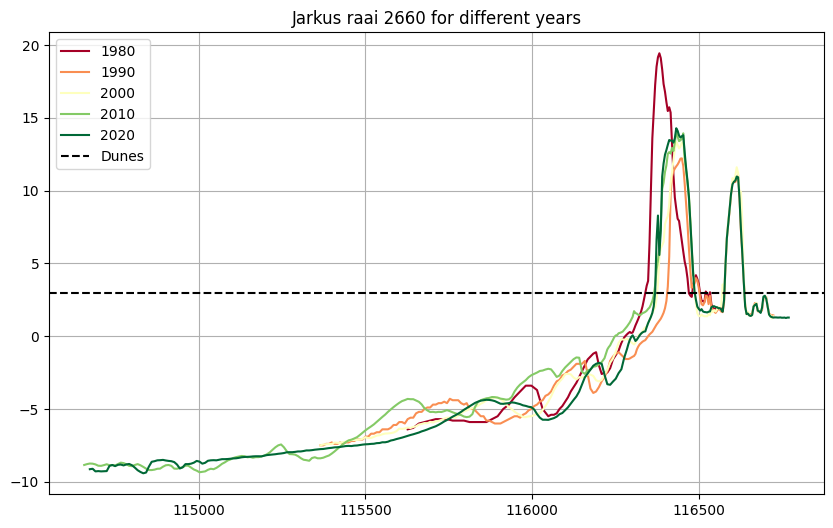

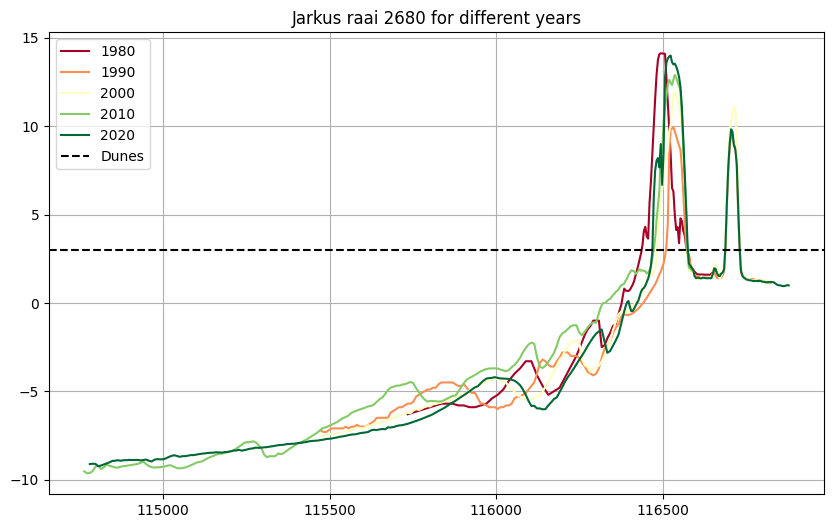

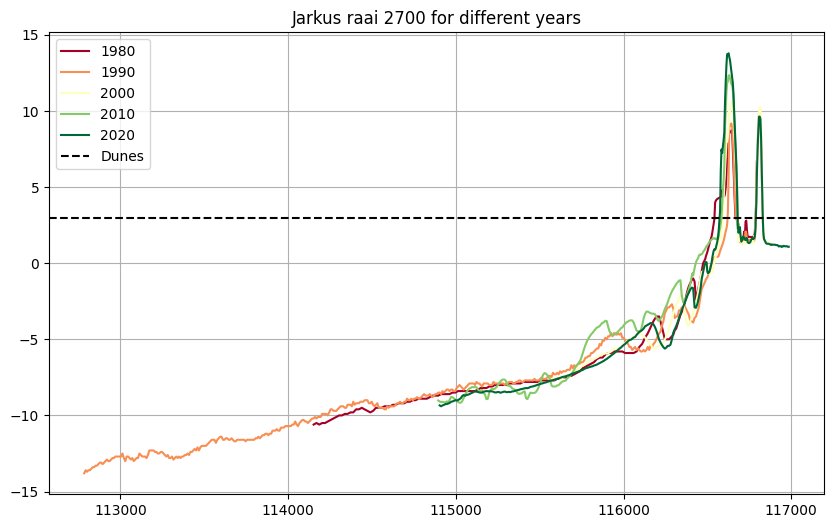

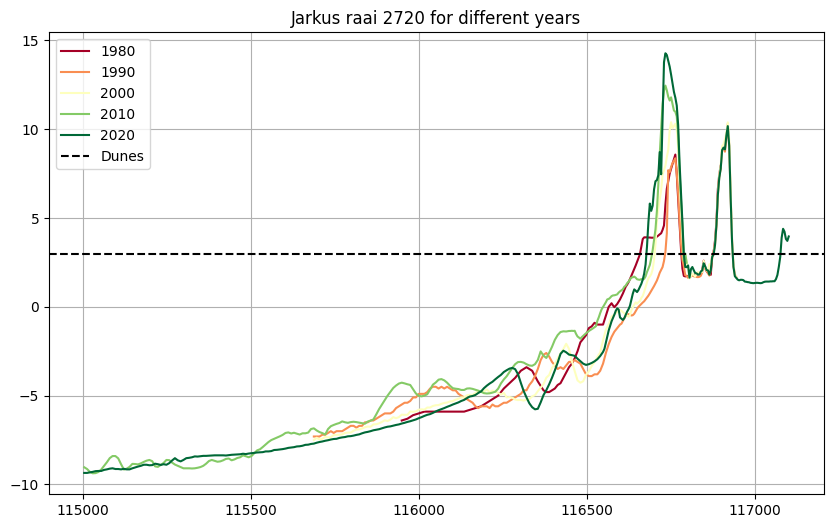

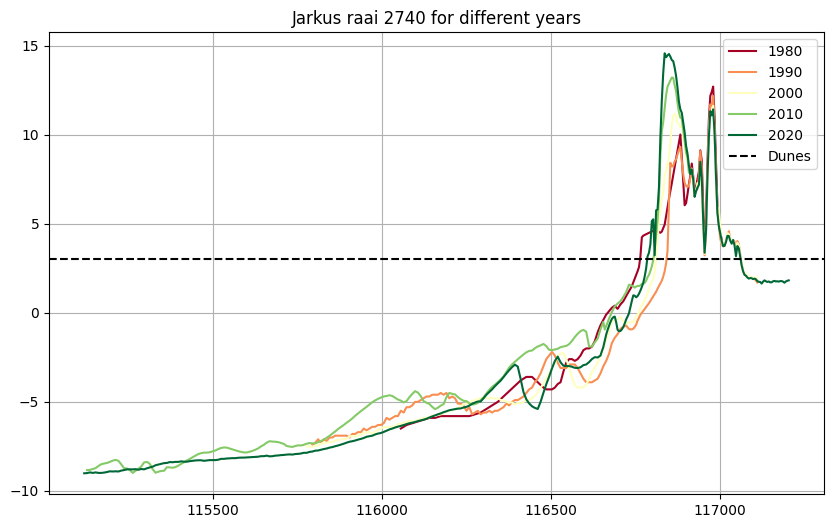

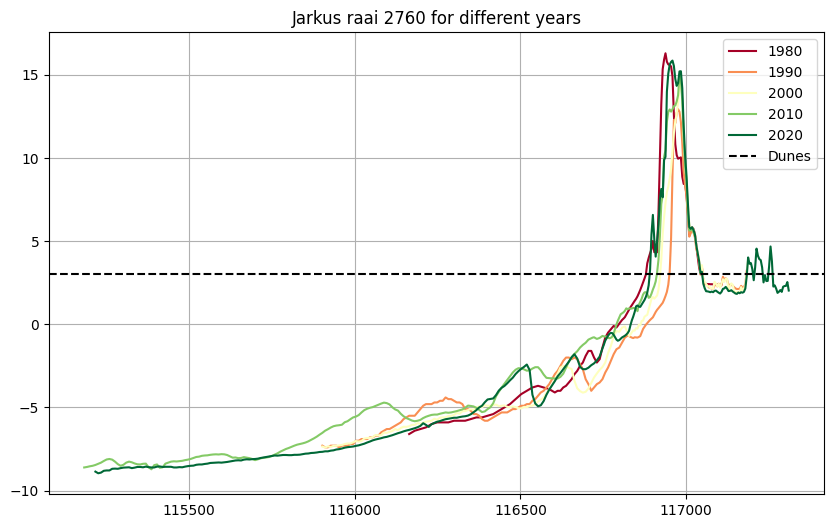

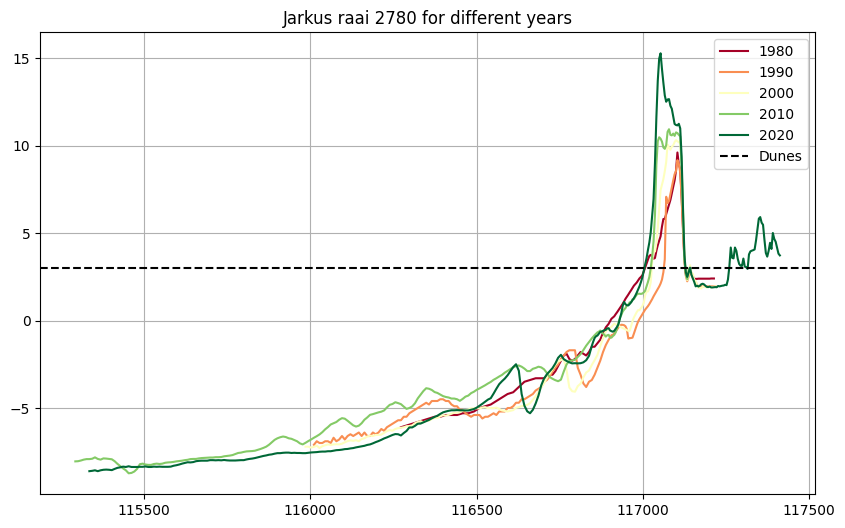

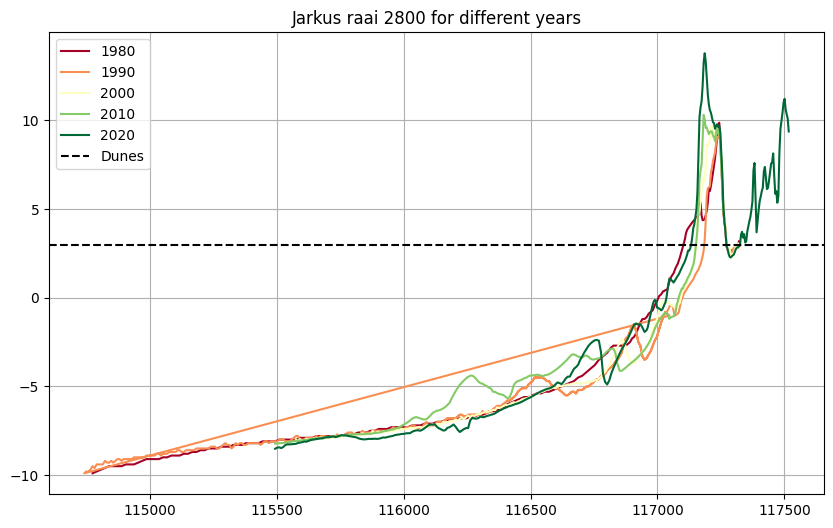

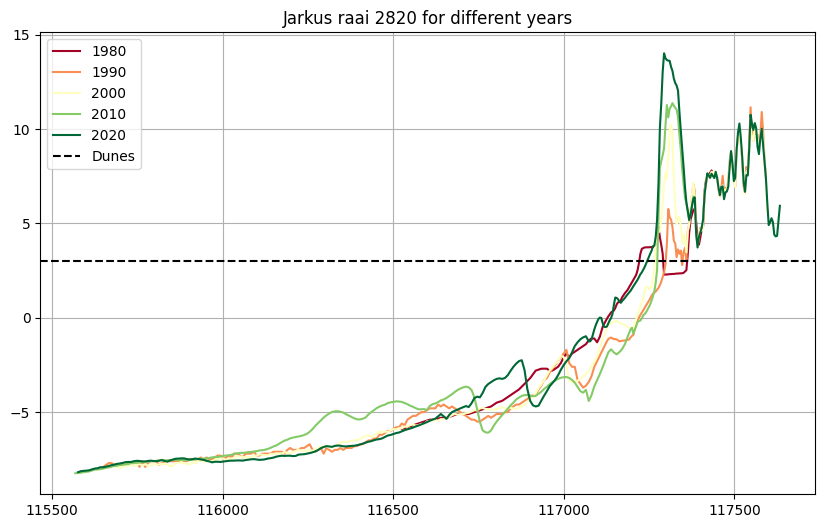

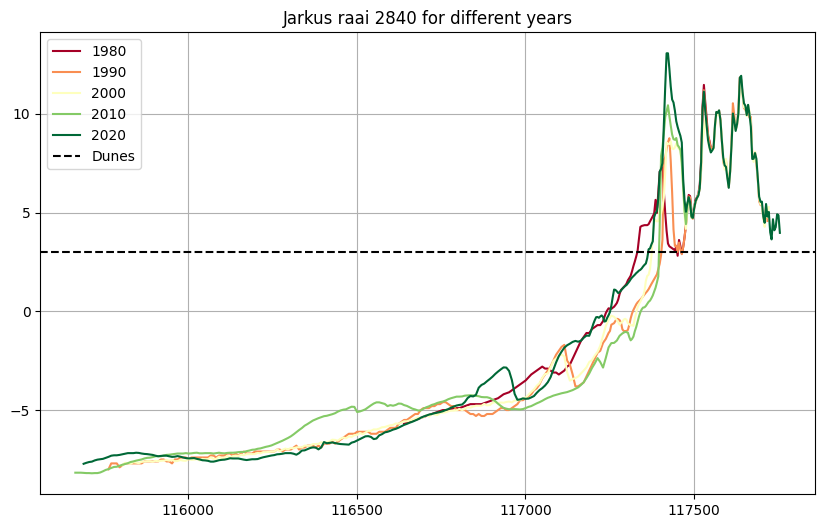

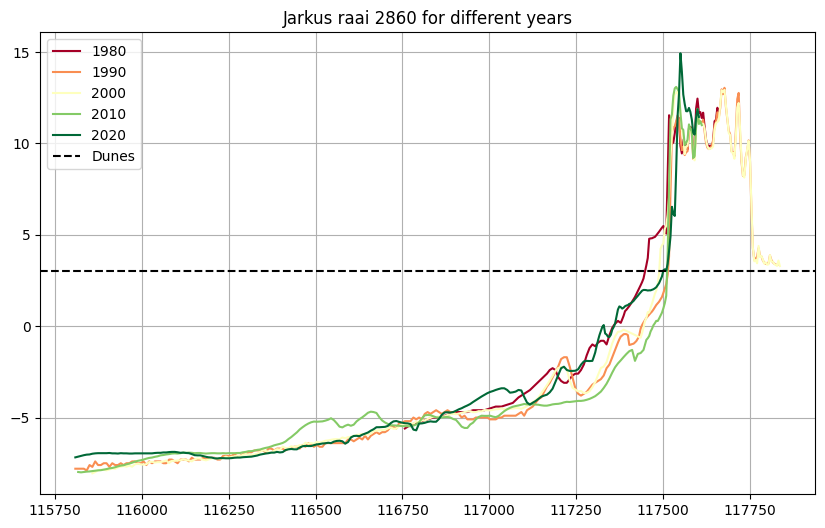

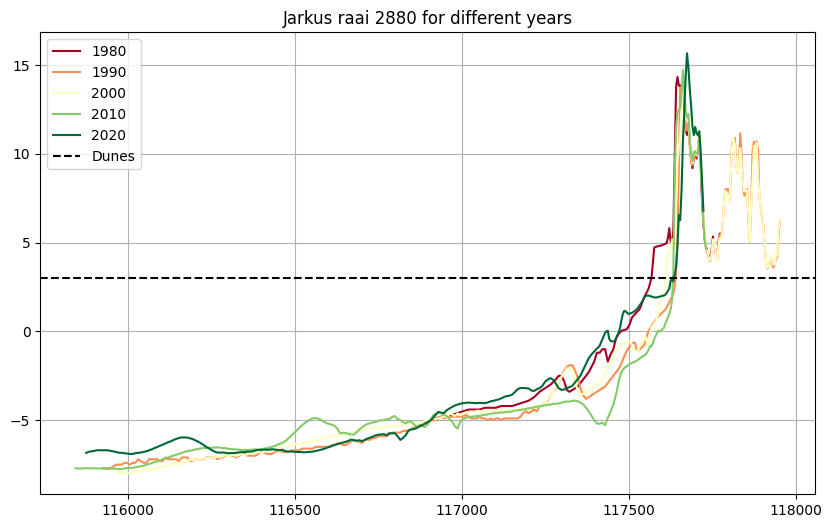

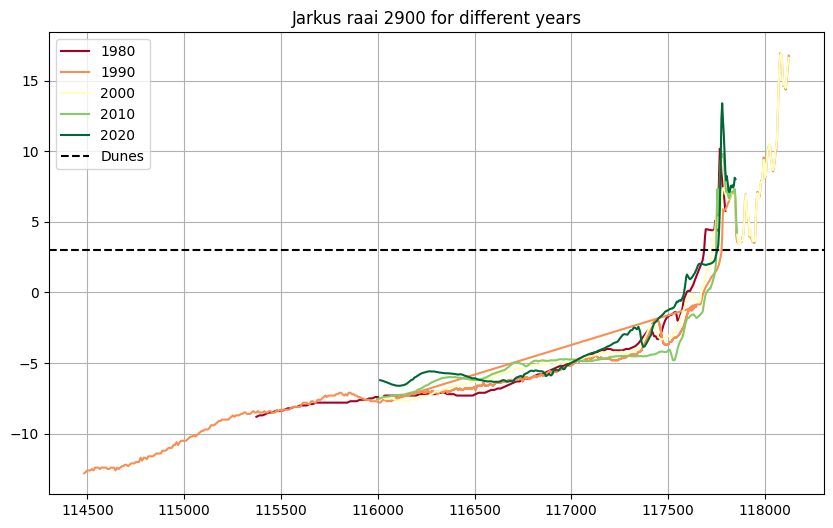

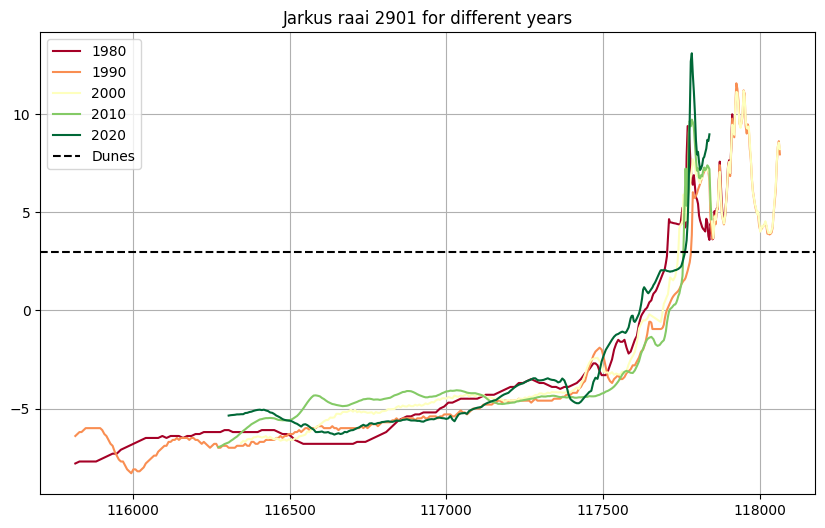

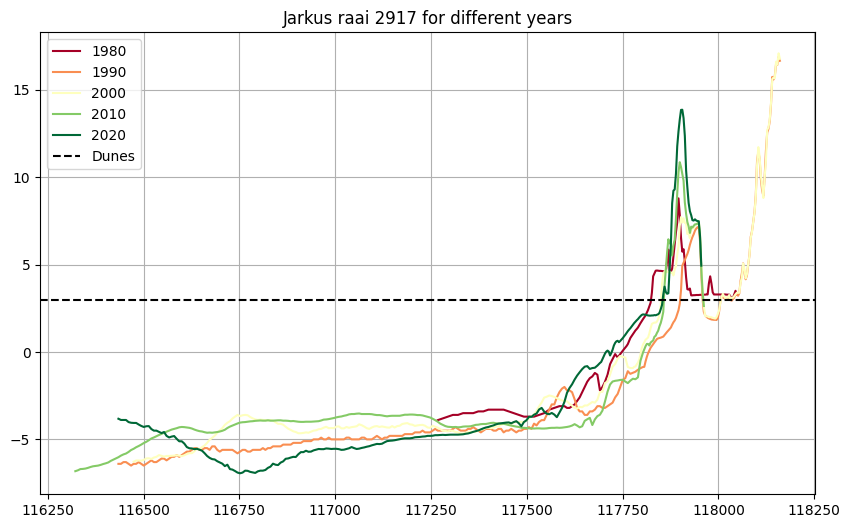

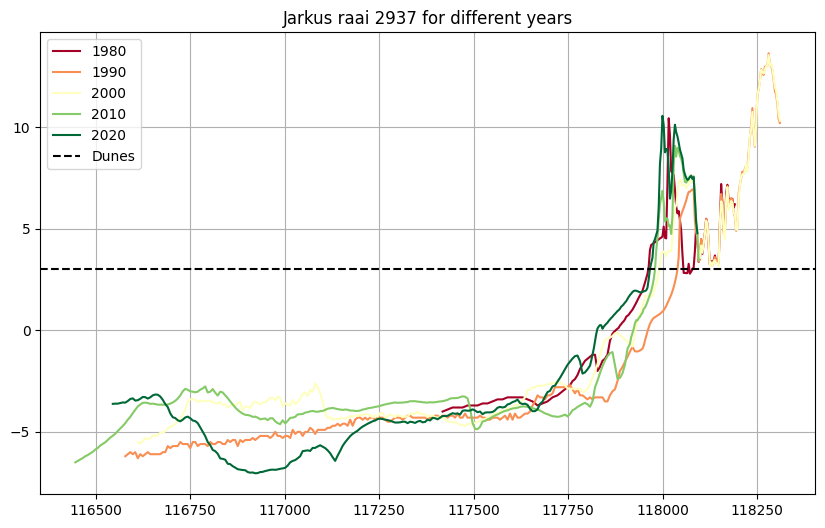

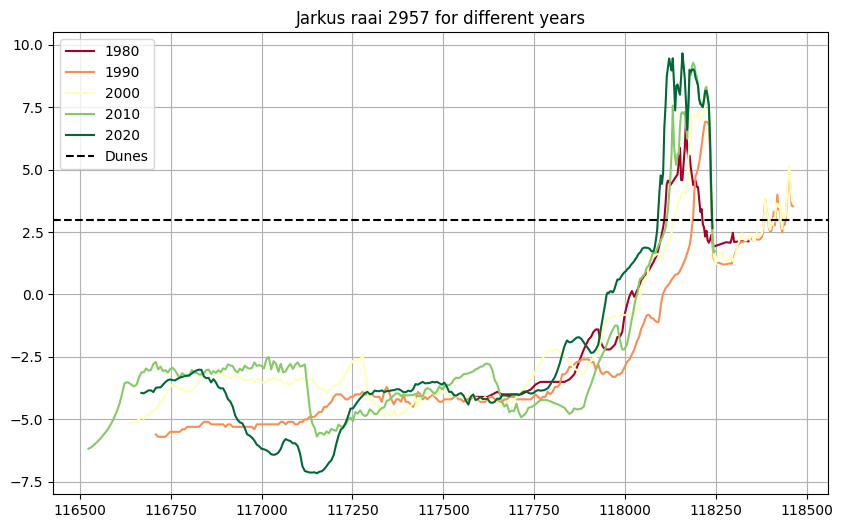

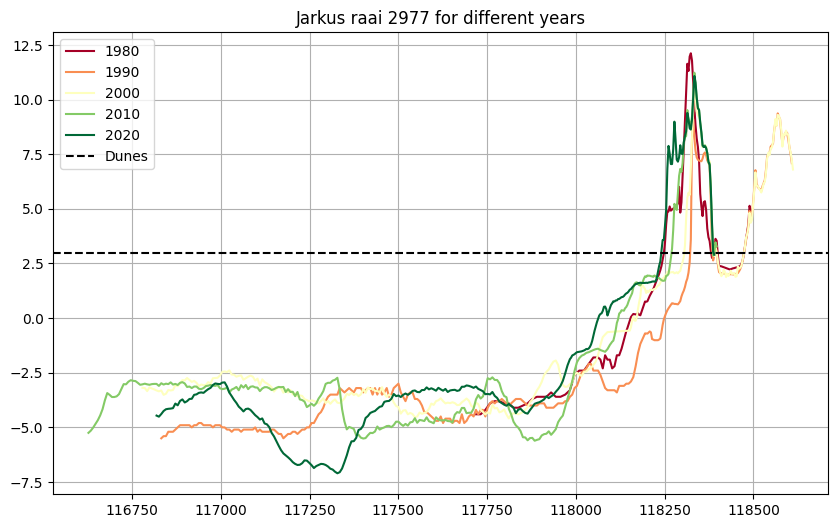

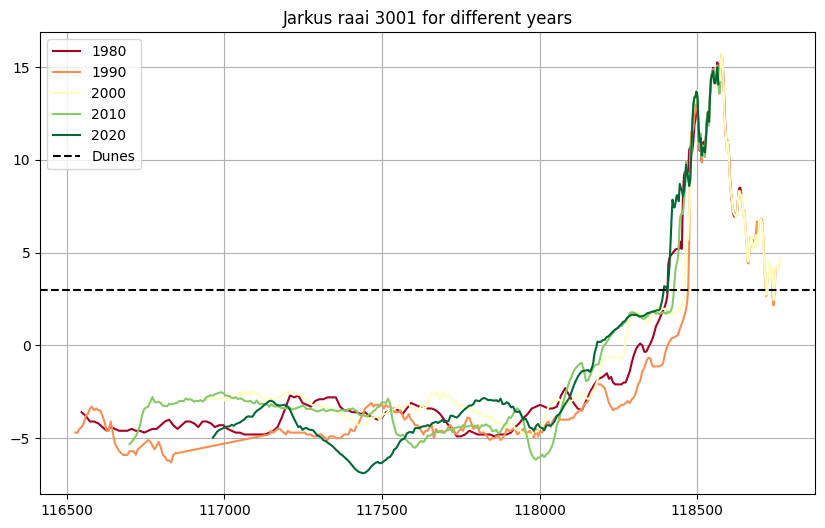

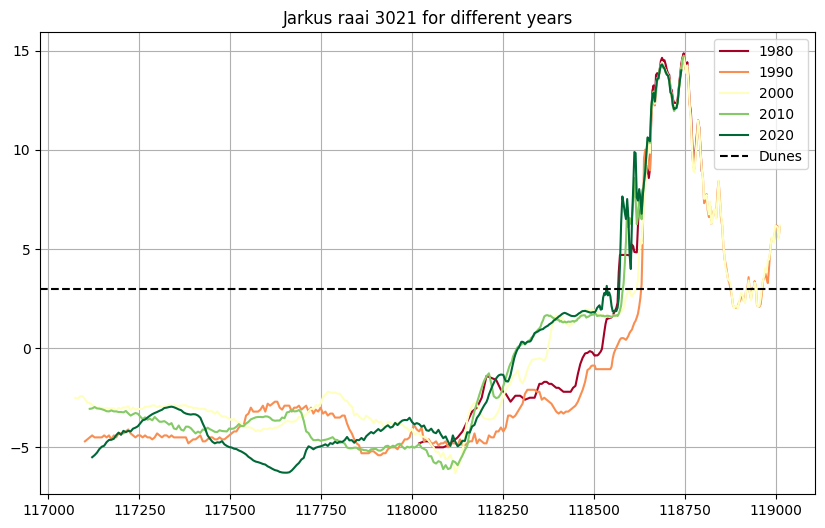

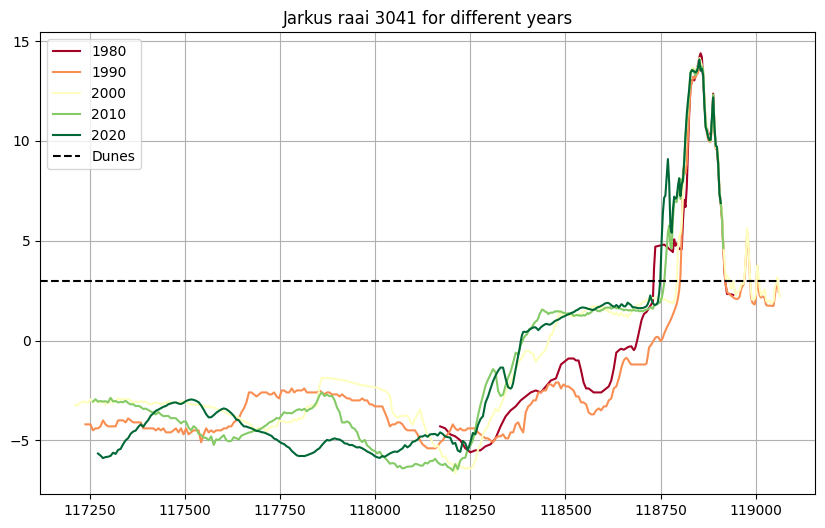

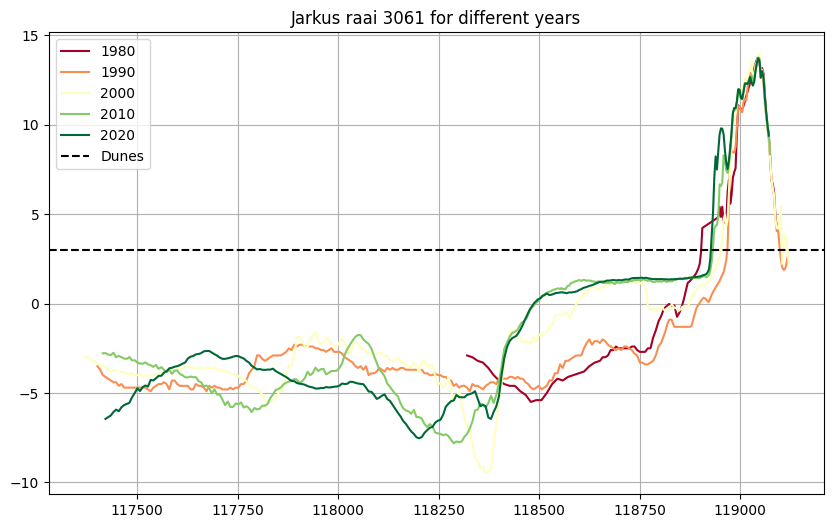

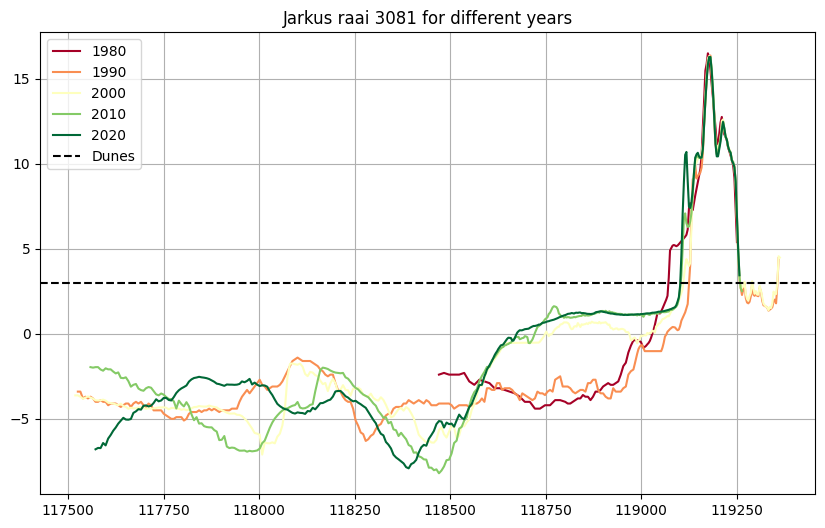

In [62]:
locations_to_view = [2111, 2131, 2151, 2171, 2191, 2211, 2231, 2251, 2271, 2291, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880, 2900, 2901, 2917, 2937, 2957, 2977, 3001, 3021, 3041, 3061, 3081]
for loc in locations_to_view: 
    sediment_budget_per_location(jarkus=loc)

/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_4068/1174317086.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col = cm.get_cmap('RdYlGn')(nr_plots / total_plots)


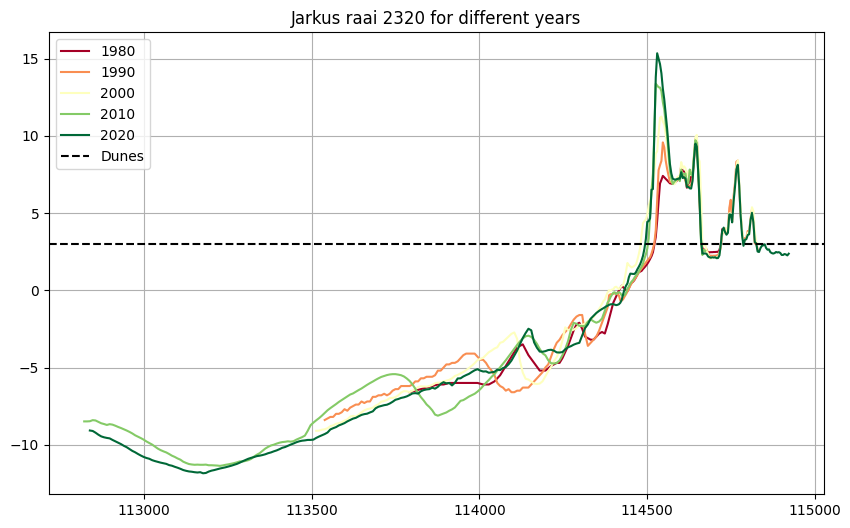

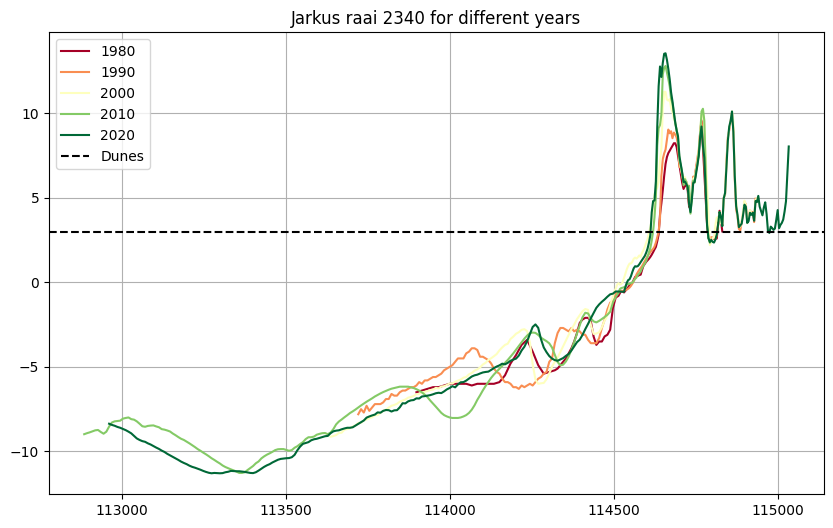

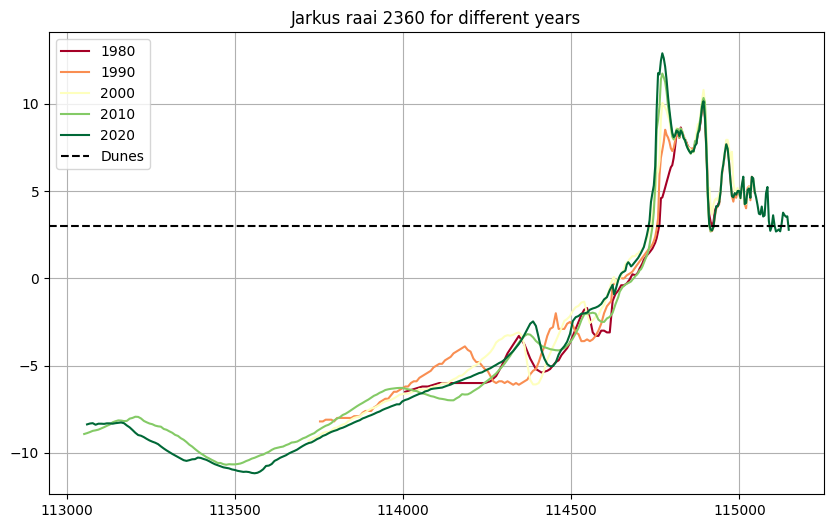

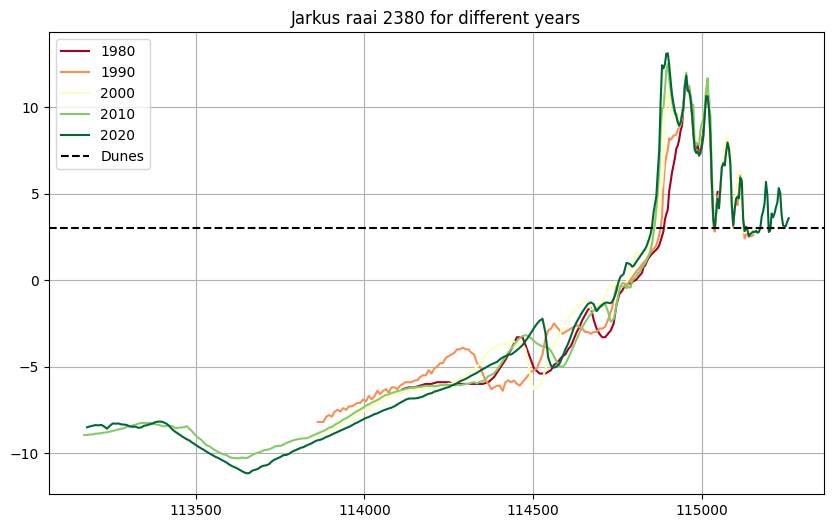

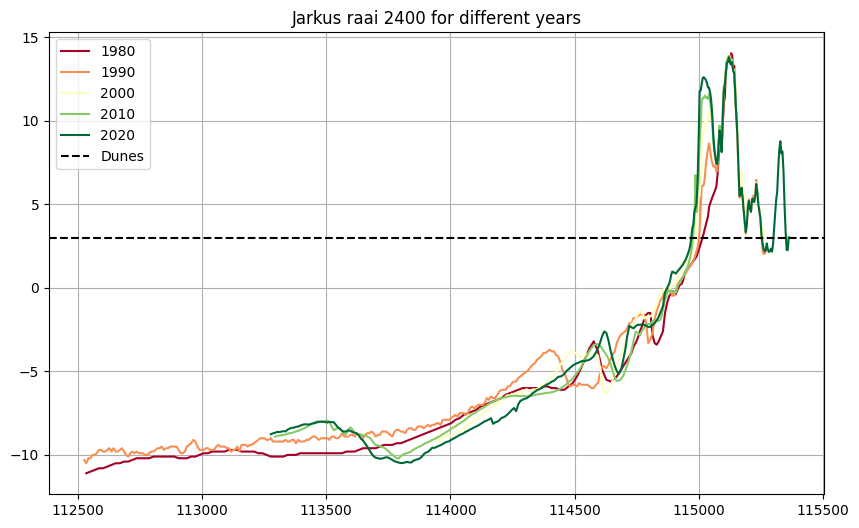

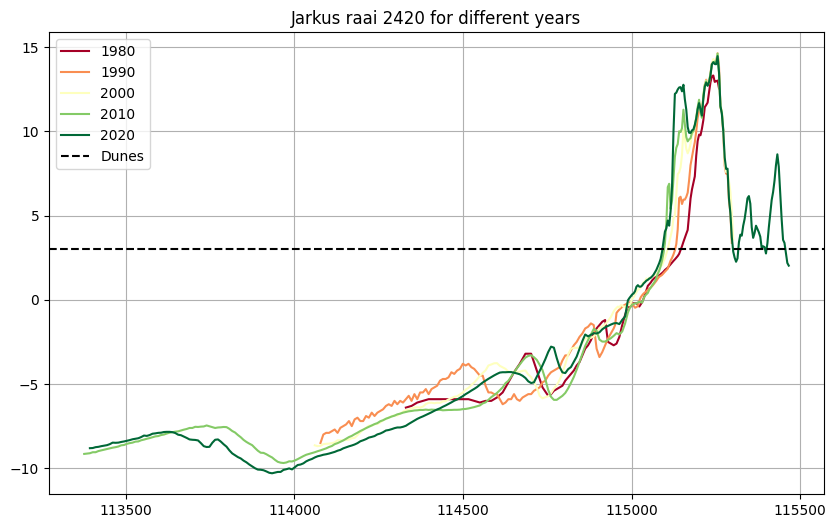

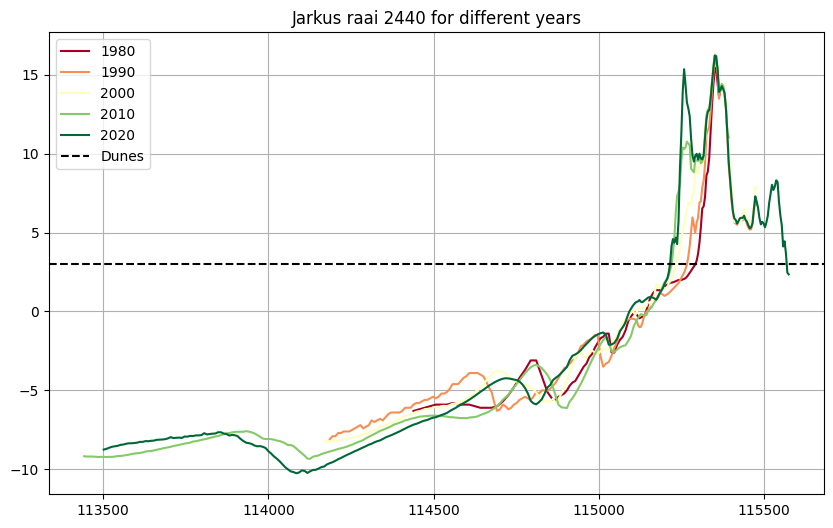

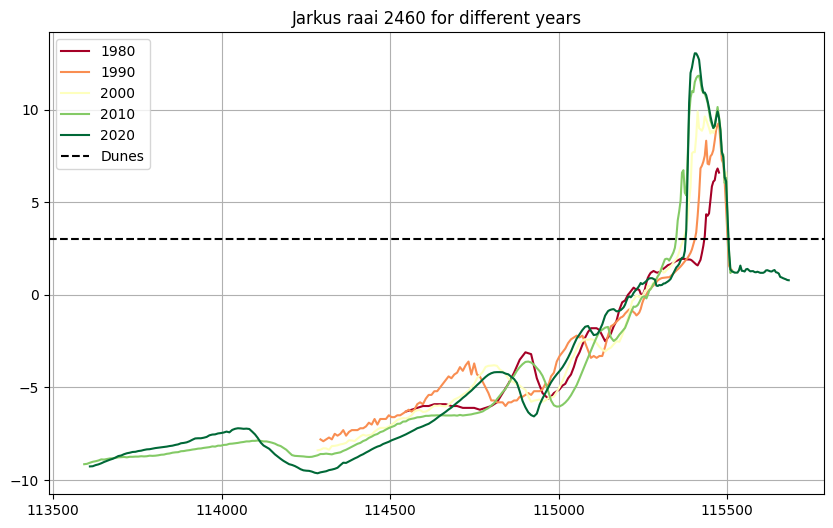

In [116]:
# raaien zonder suppleties
locations_to_view = [2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460]
for loc in locations_to_view: 
    sediment_budget_per_location(jarkus=loc)

/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_4068/1174317086.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col = cm.get_cmap('RdYlGn')(nr_plots / total_plots)


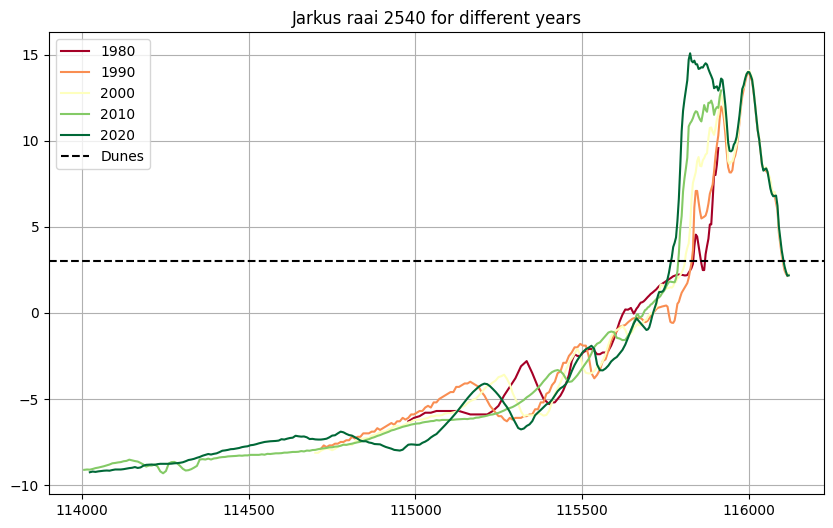

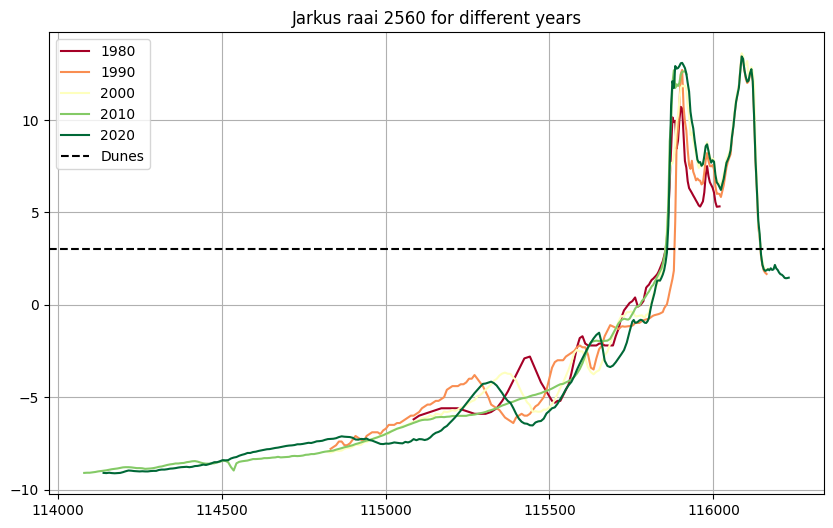

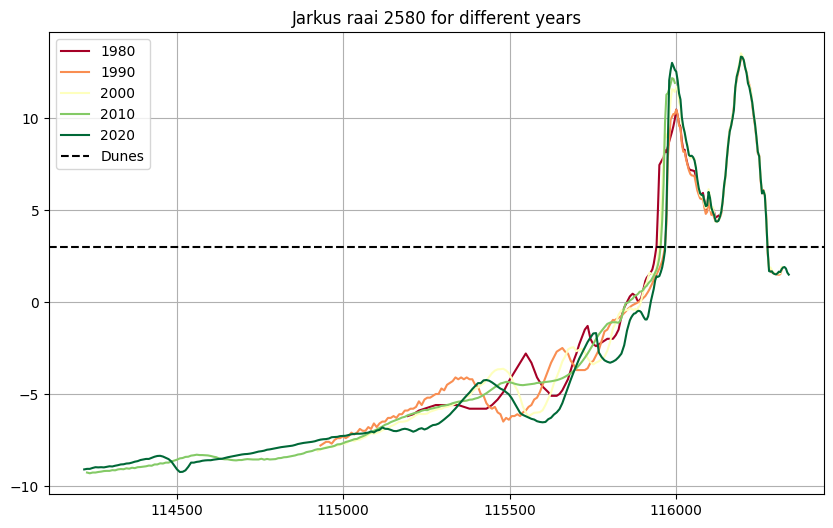

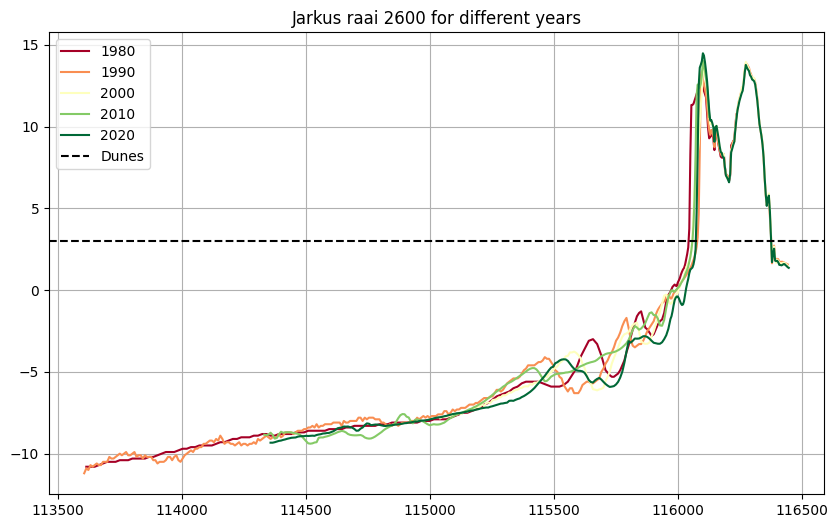

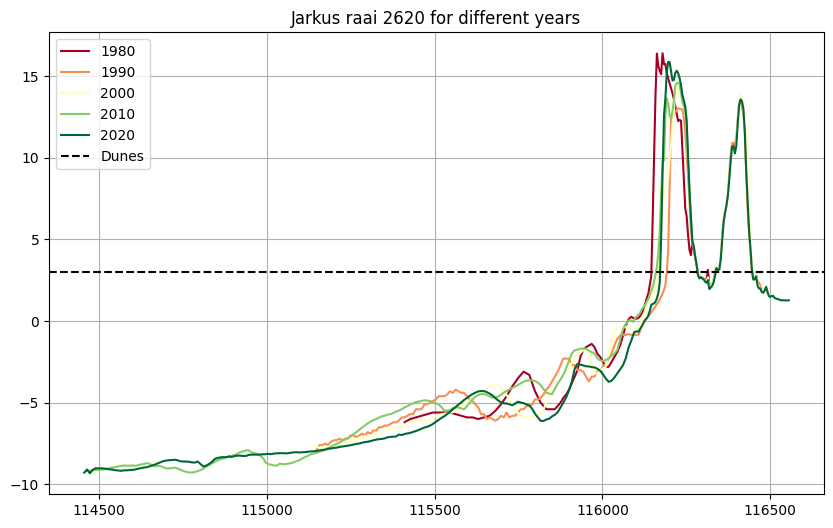

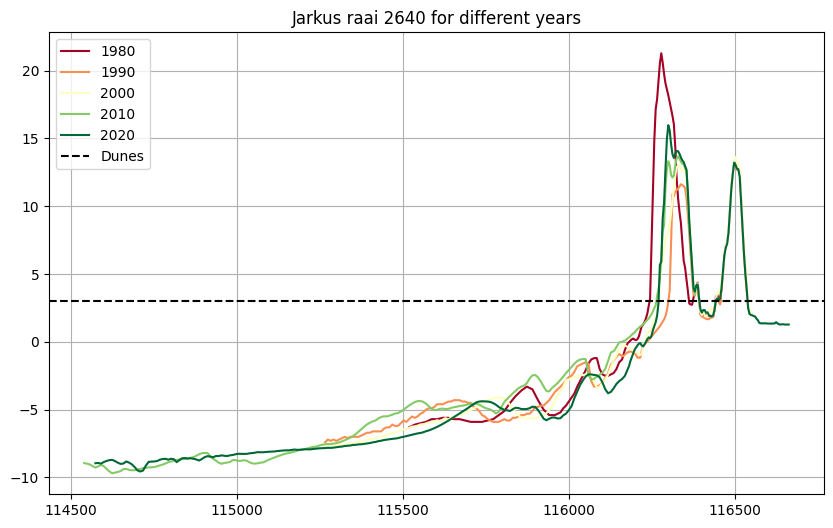

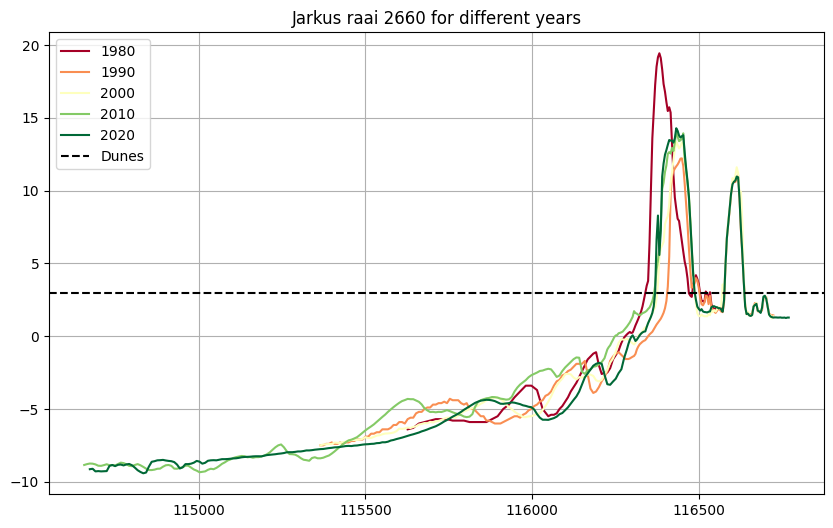

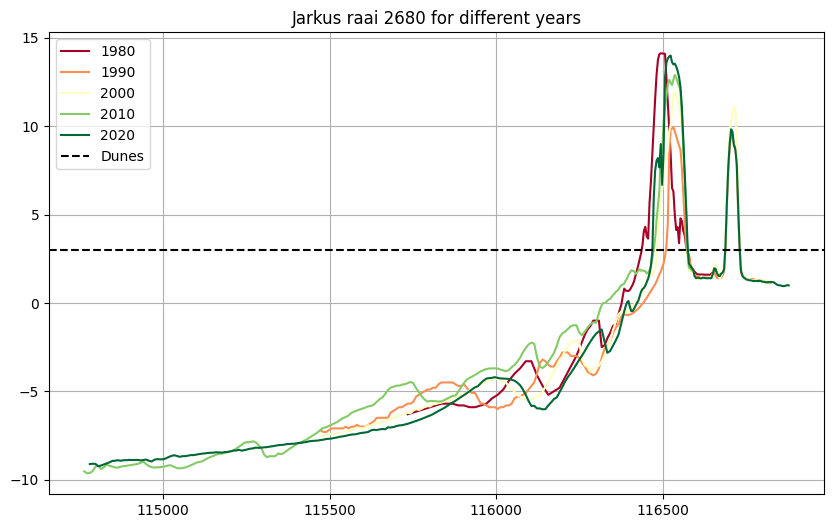

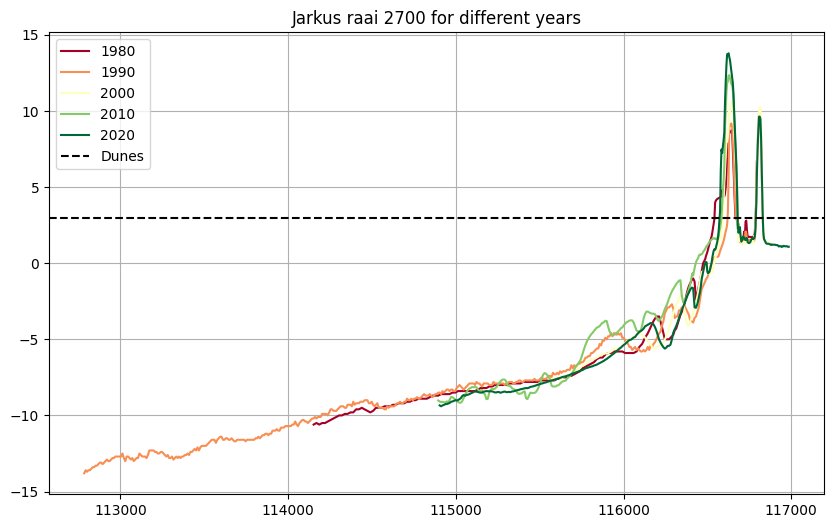

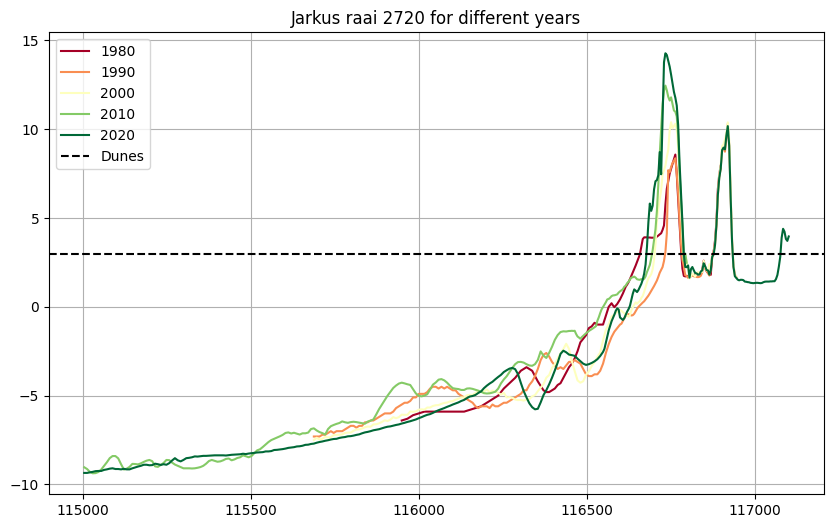

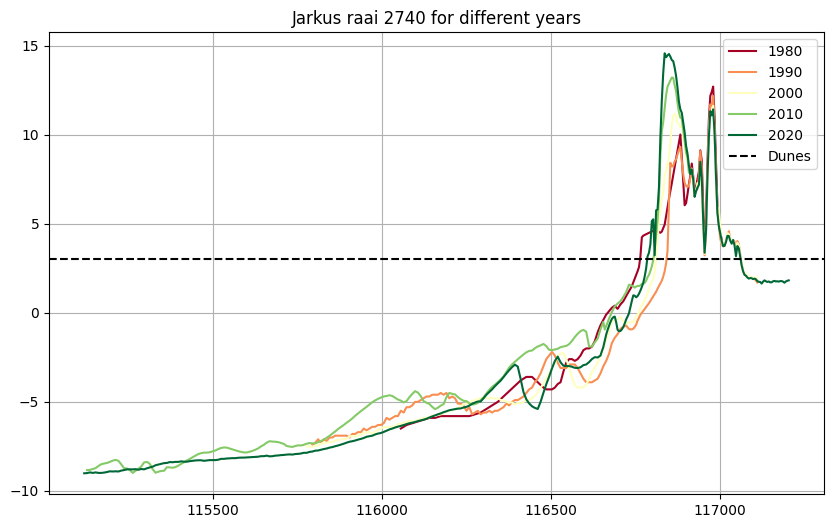

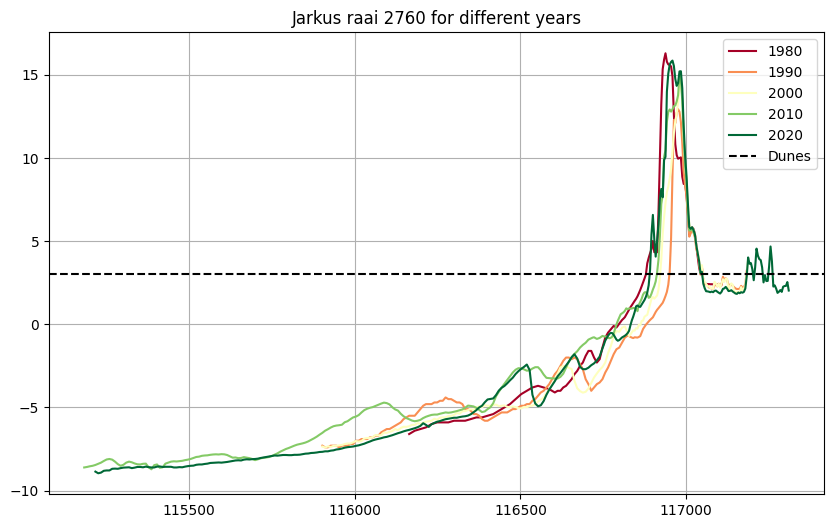

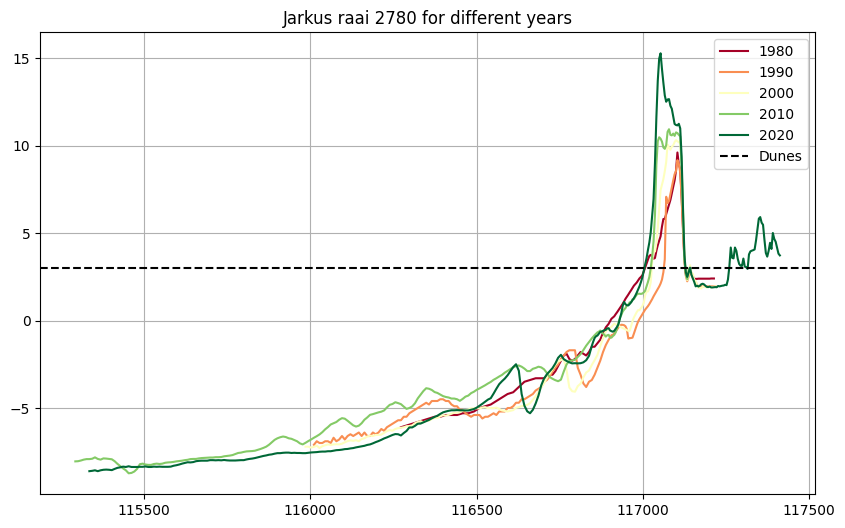

In [117]:
# suppleties tussen raaien 2540 en 2780 met einddatum 2021
locations_to_view = [2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 2700, 2720, 2740, 2760, 2780]
for loc in locations_to_view: 
    sediment_budget_per_location(jarkus=loc)

/var/folders/g4/8z1prdqs5l3dj5xzv765t_sc0000gn/T/ipykernel_4068/1174317086.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col = cm.get_cmap('RdYlGn')(nr_plots / total_plots)


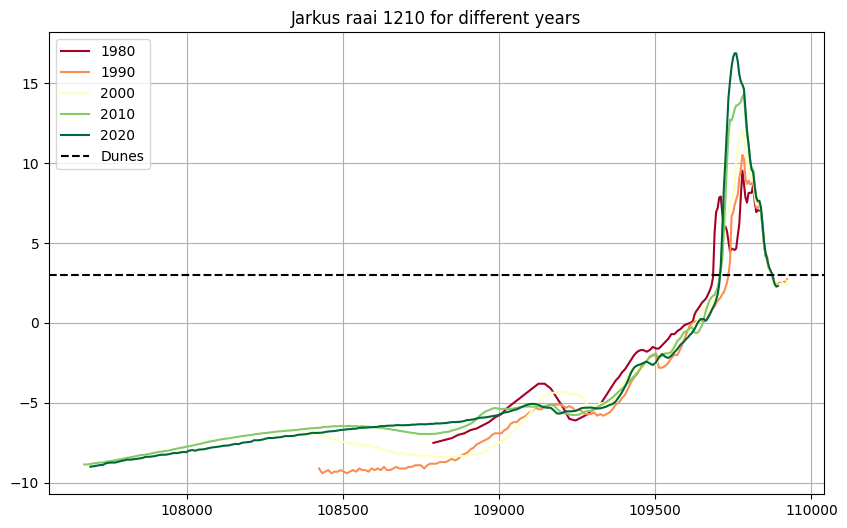

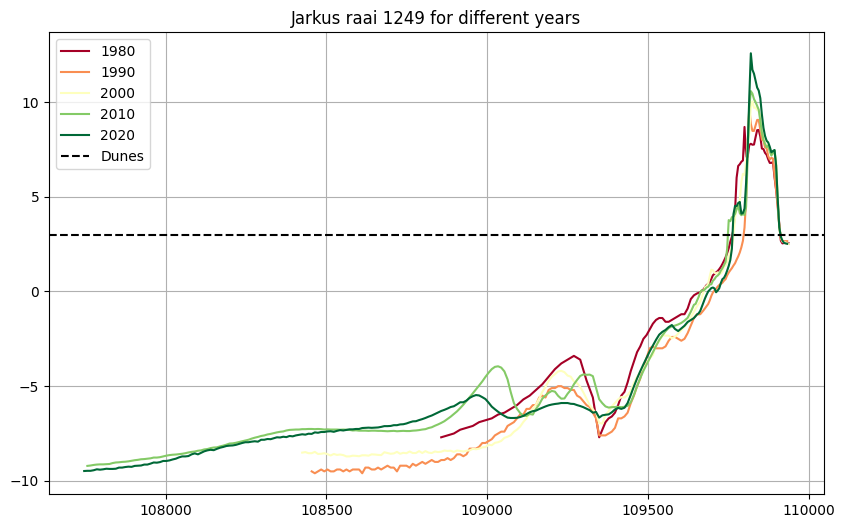

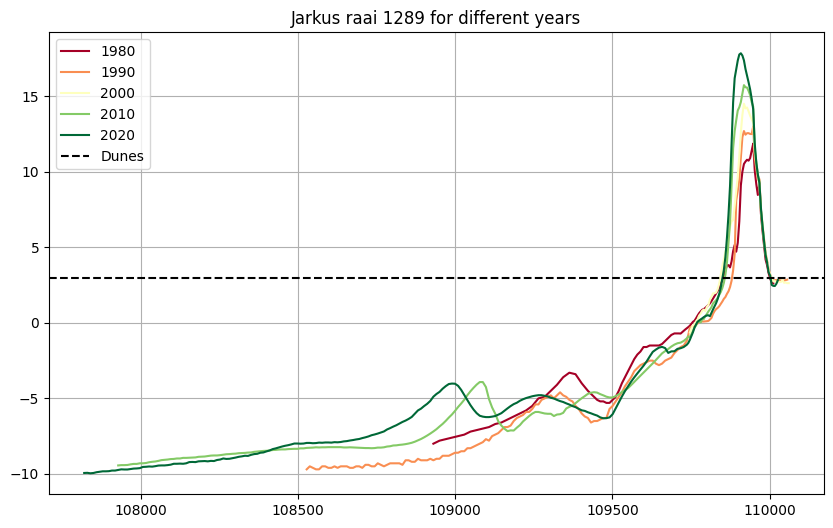

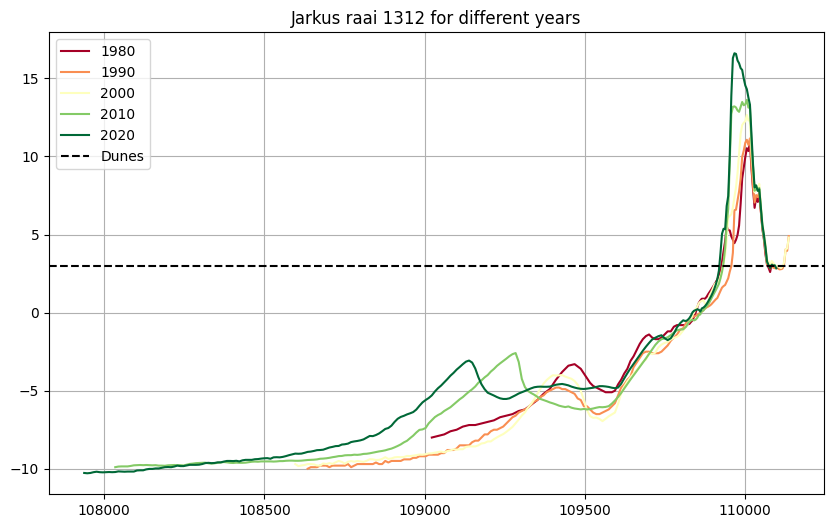

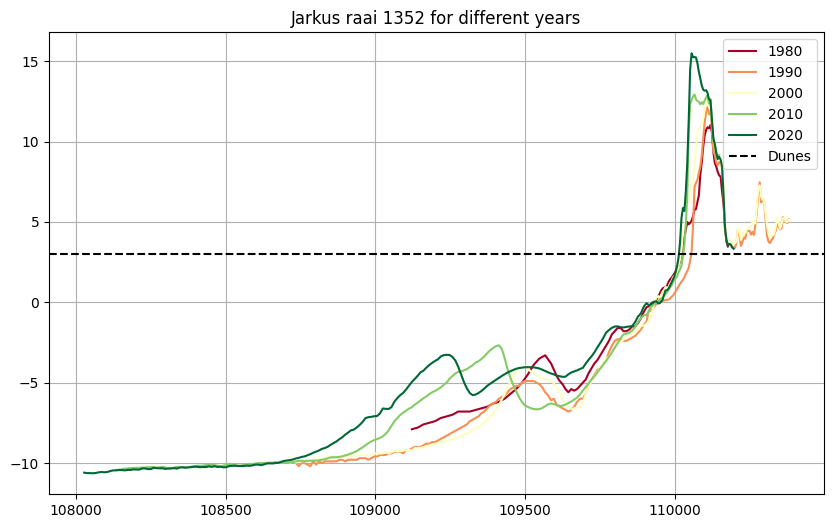

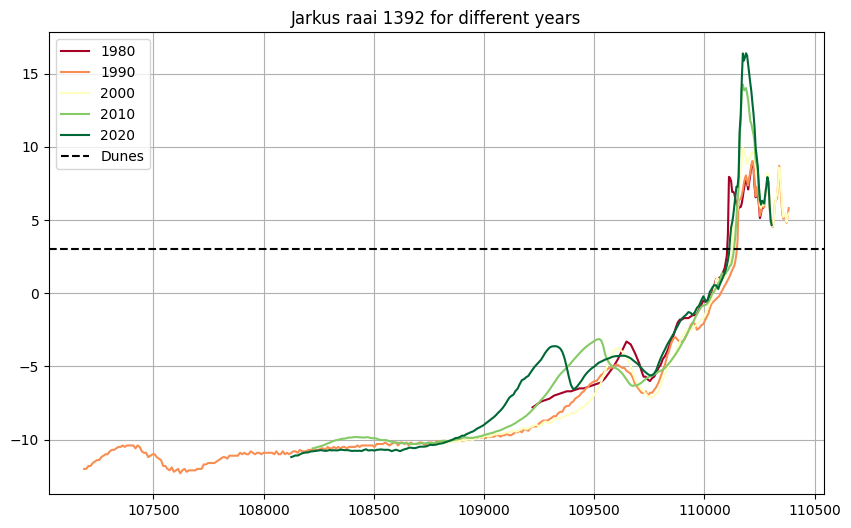

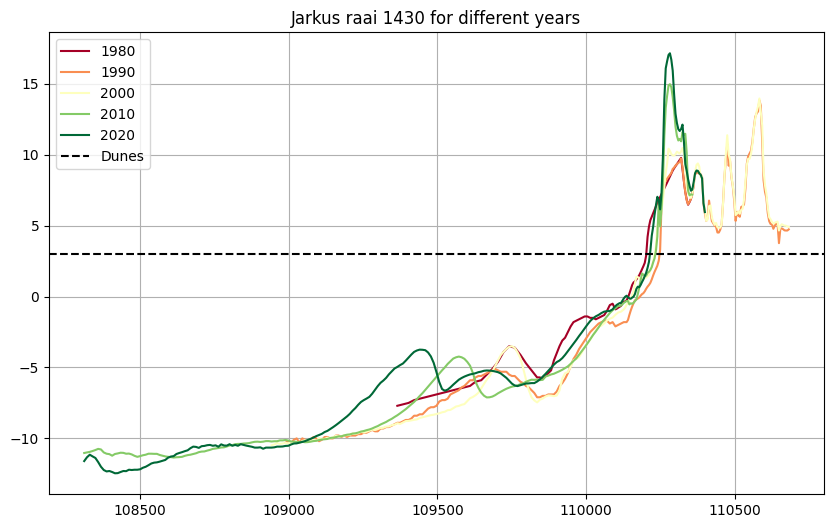

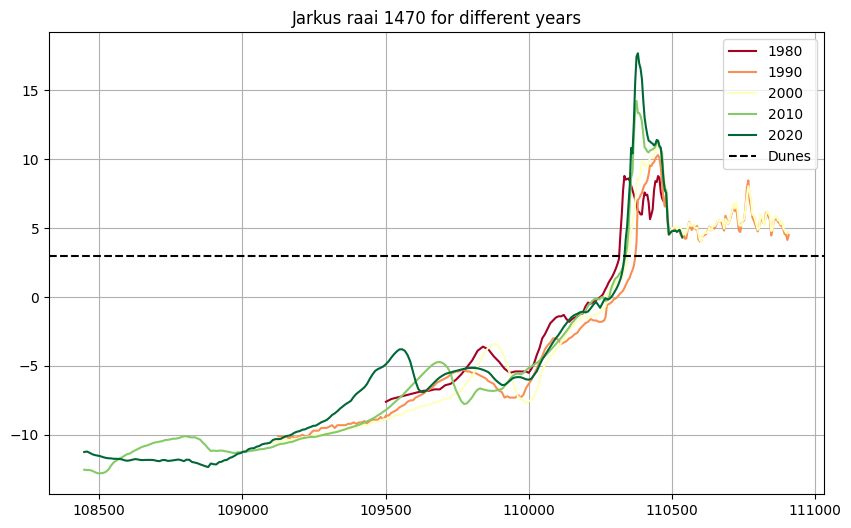

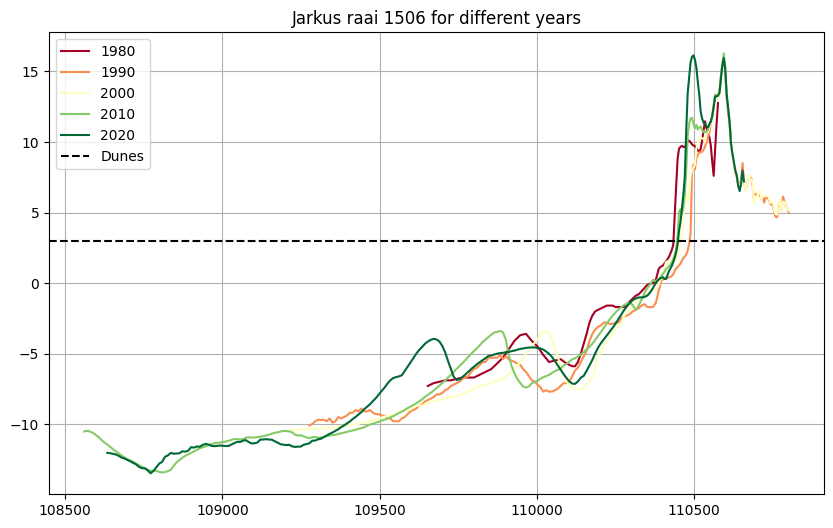

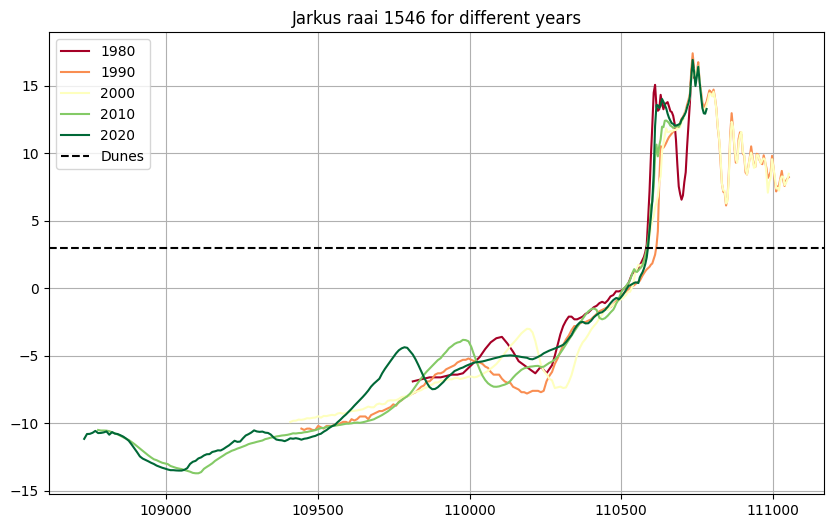

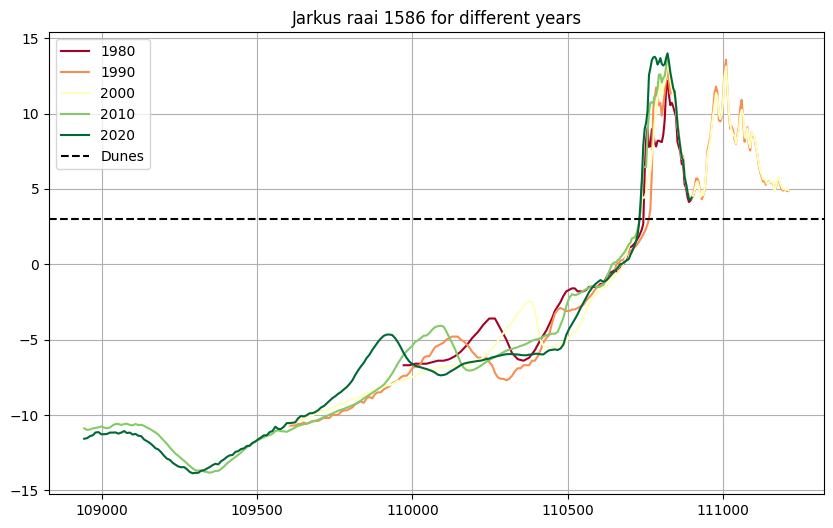

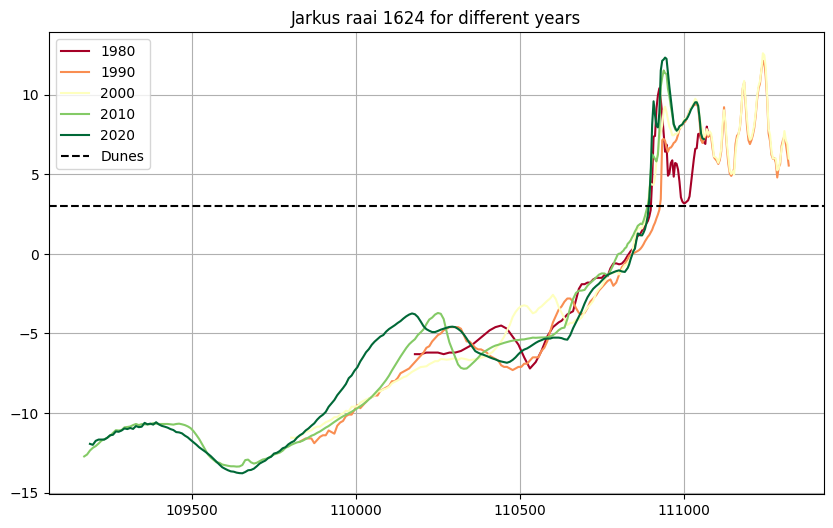

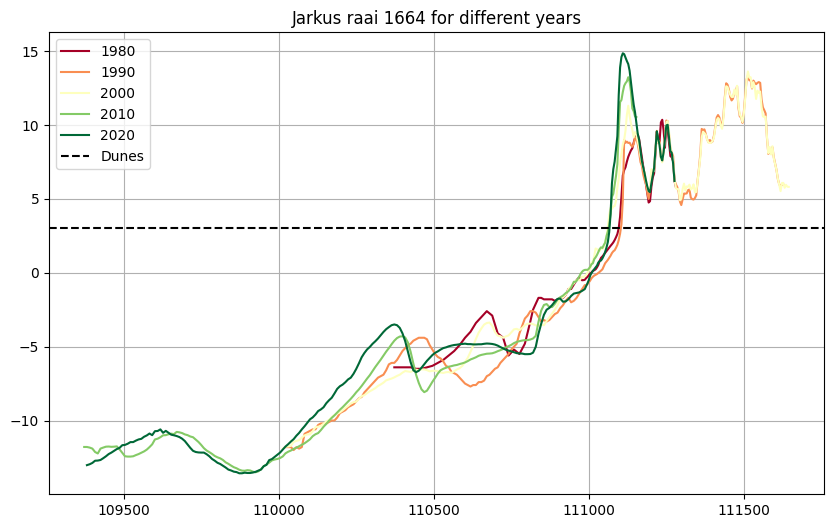

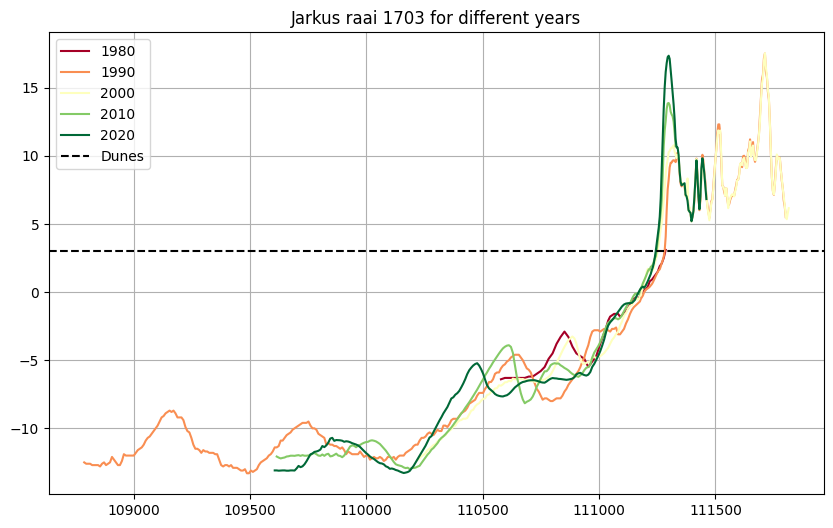

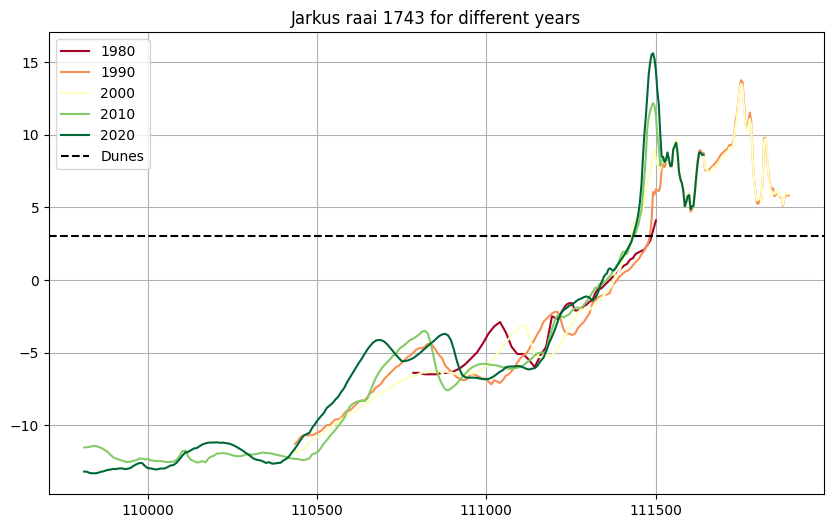

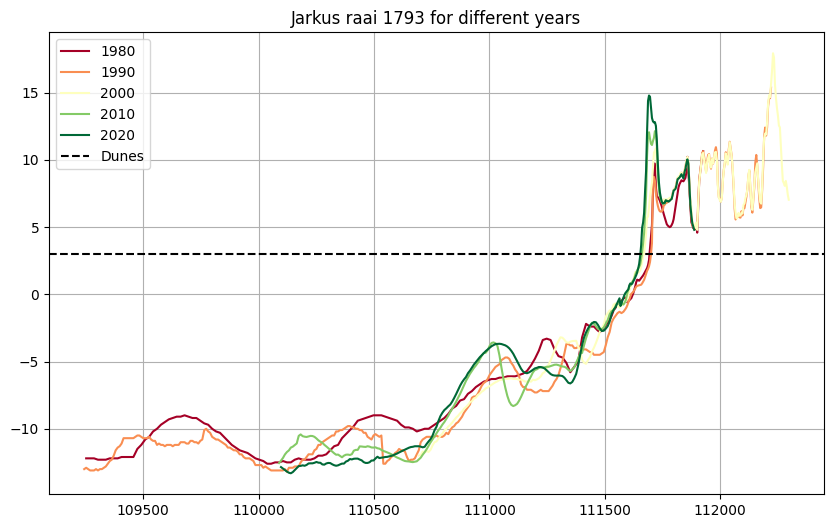

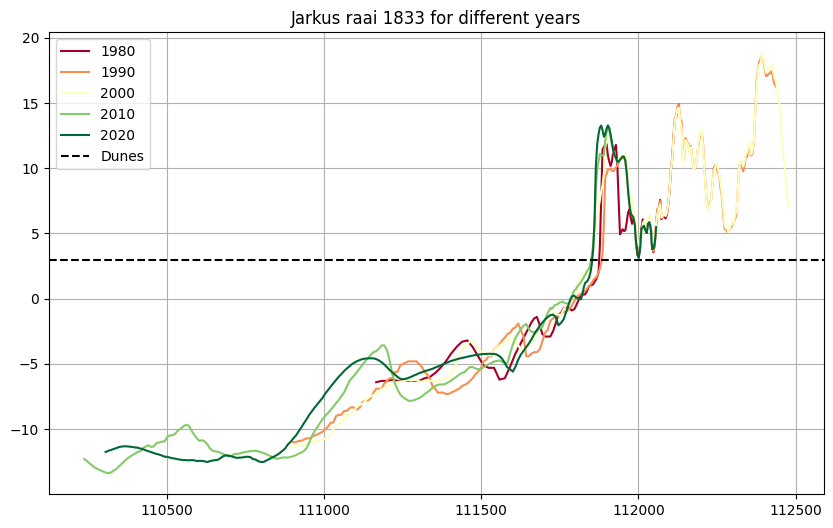

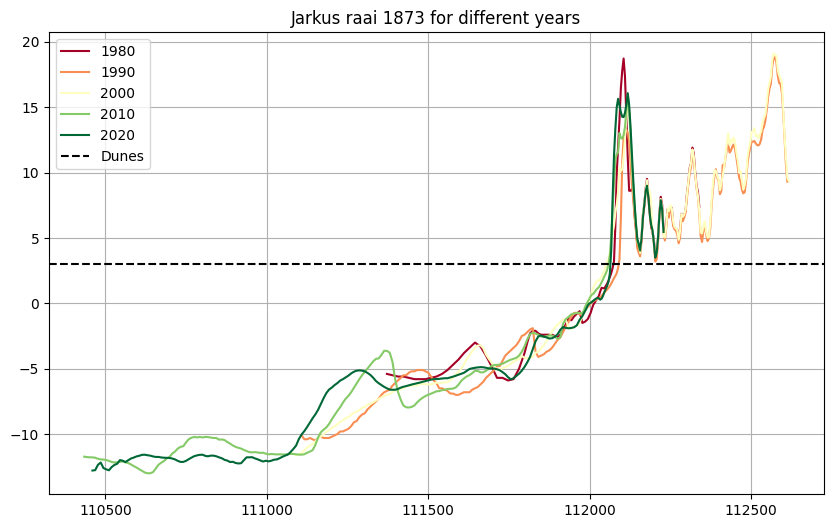

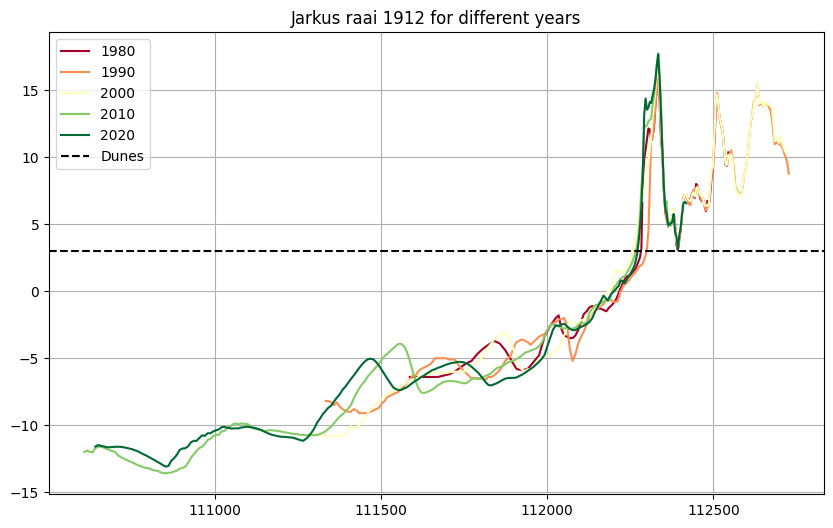

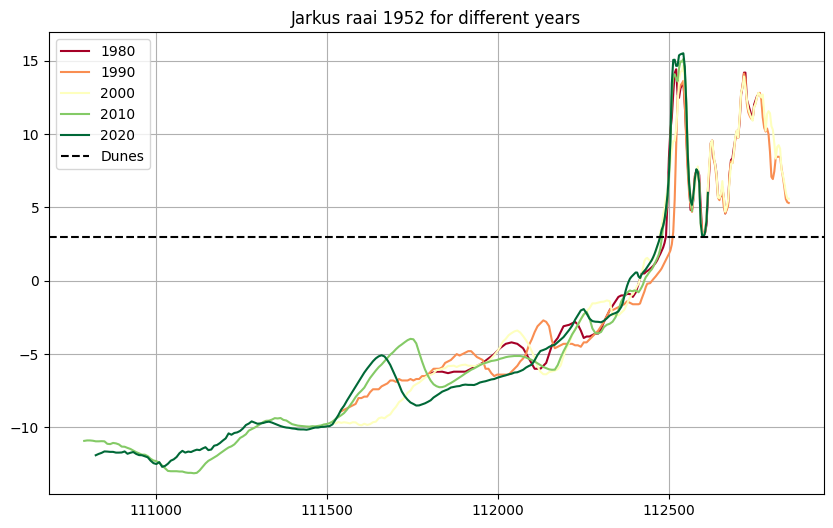

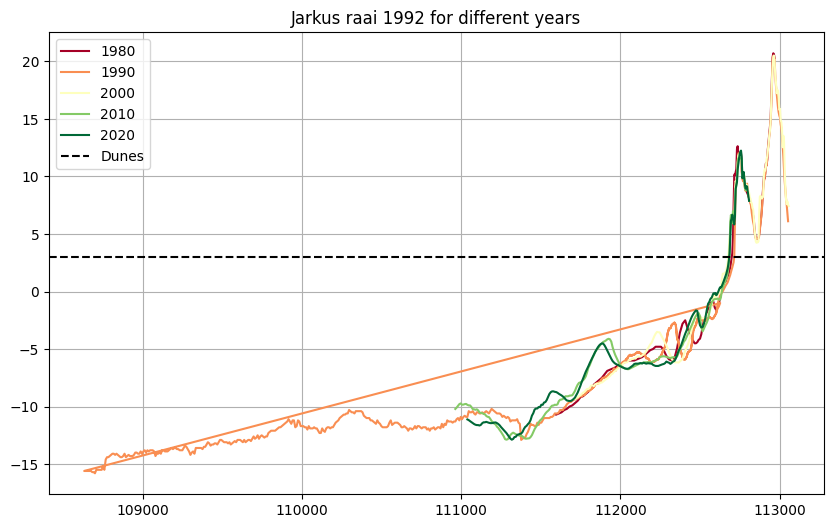

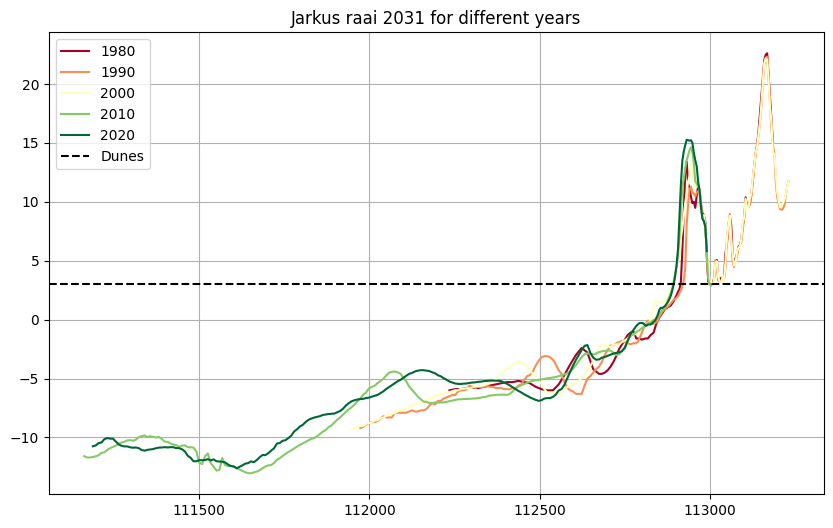

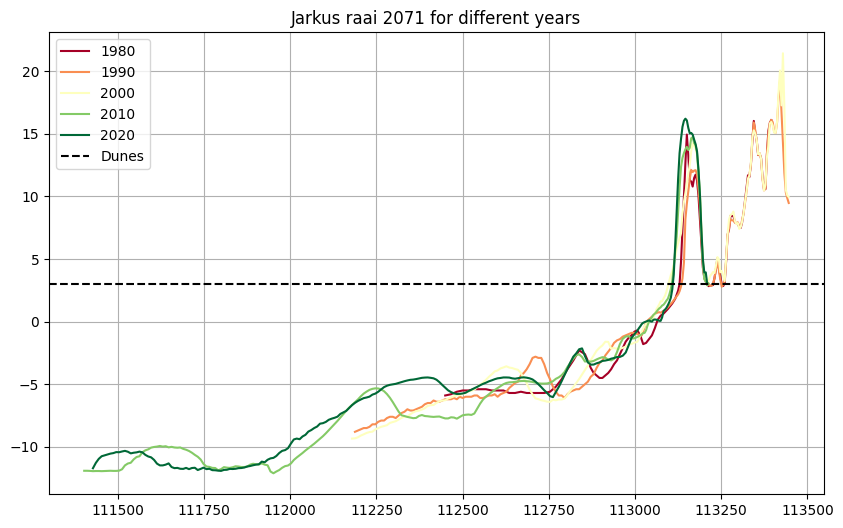

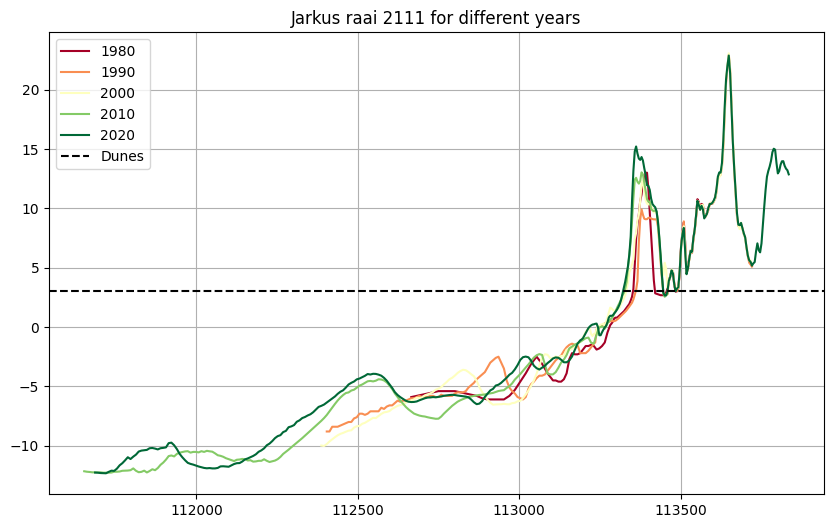

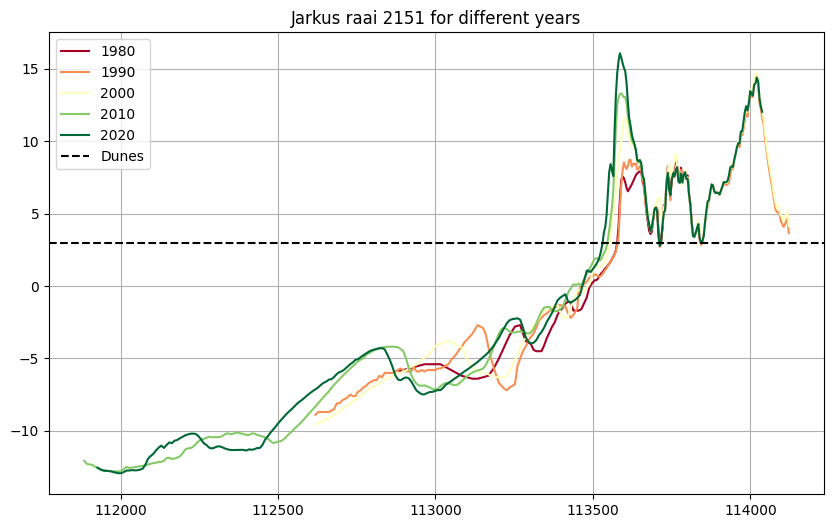

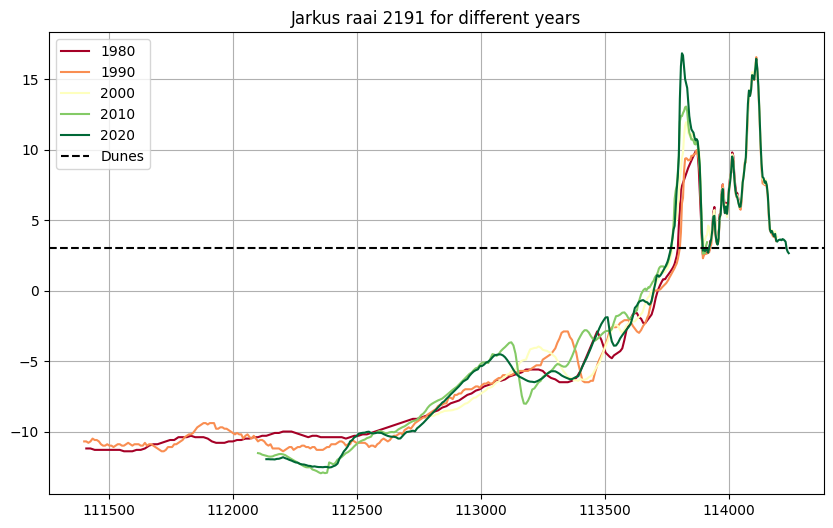

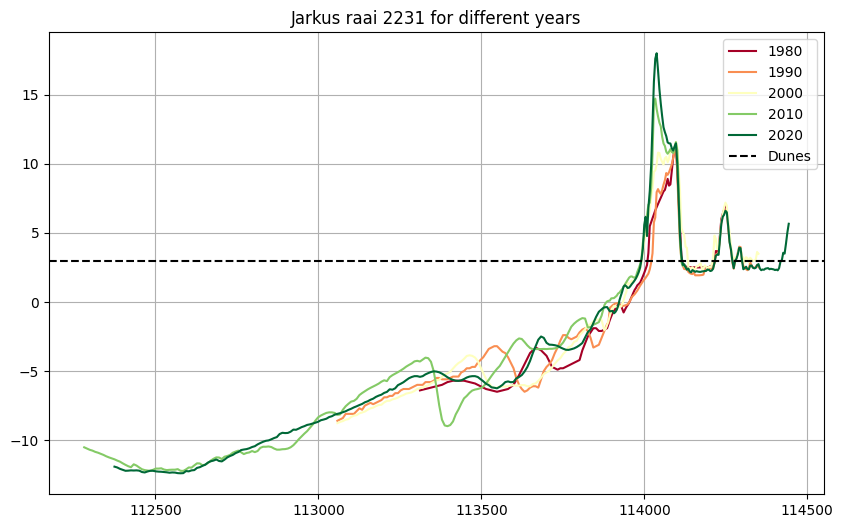

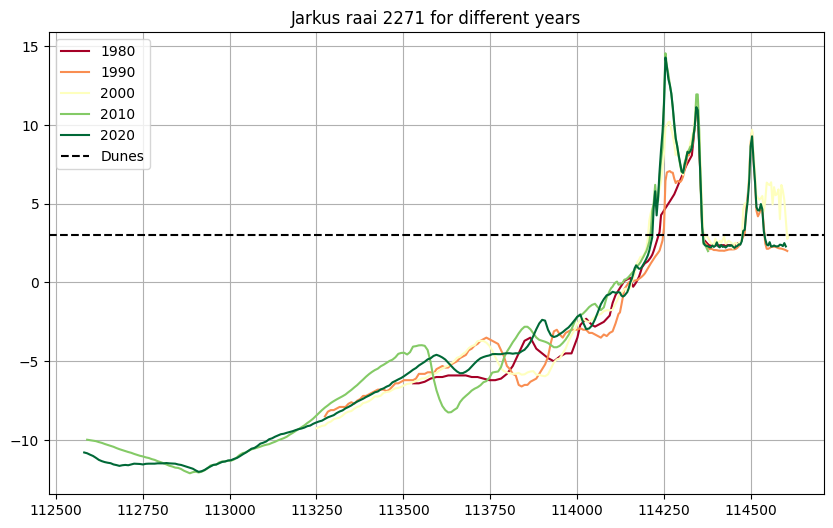

In [118]:
# suppleties tussen raaien 1210 en 2291 na (ongeveer) het jaar 2000
locations_to_view = [1210, 1249, 1289, 1312, 1352, 1392, 1430, 1470, 1506, 1546, 1586, 1624, 1664, 1703, 1743, 1793, 1833, 1873, 1912, 1952, 1992, 2031, 2071, 2111, 2151, 2191, 2231, 2271]
for loc in locations_to_view: 
    sediment_budget_per_location(jarkus=loc)